# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

zsh:1: command not found: pip


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
# uncomment the following lines if Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Loan = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment/Personal-Loan-Campaign/Loan_Modelling.csv")

In [4]:
Loan = pd.read_csv("/Users/christophebuffard/Google Drive/My Drive/Colab Notebooks/Assignment/Personal-Loan-Campaign/Loan_Modelling.csv")

In [5]:
data = Loan.copy()

## Data Overview

* Observations
* Sanity checks

In [6]:
data.head(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [7]:
data.shape

(5000, 14)

In [8]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
data.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [12]:
data.value_counts()

ID    Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  CreditCard
1     25   1           49      91107    4       1.6    1          0         0              1                   0           0       0             1
3331  34   9           32      95054    4       1.1    3          0         0              0                   0           1       0             1
3338  59   29          61      92008    3       2.0    3          0         0              0                   0           1       0             1
3337  60   34          11      94305    4       0.7    3          0         0              0                   0           1       0             1
3336  35   10          118     92069    2       7.8    1          358       0              0                   0           0       0             1
                                                                                                                           

## Handling duplicated data for ID

In [13]:
print(data["ID"].sum())
print(data["ID"].duplicated())



12502500
0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: ID, Length: 5000, dtype: bool


Conclusion: no duplicated data was found in the ID. All rows are unique customers. We can now drop the column as it will not bring information.

In [14]:
# Dropping the ID
data.drop("ID", axis=1, inplace=True)

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Performing univar analysis
This will allow us to detect:


*   Outliers
*   inconsistent data



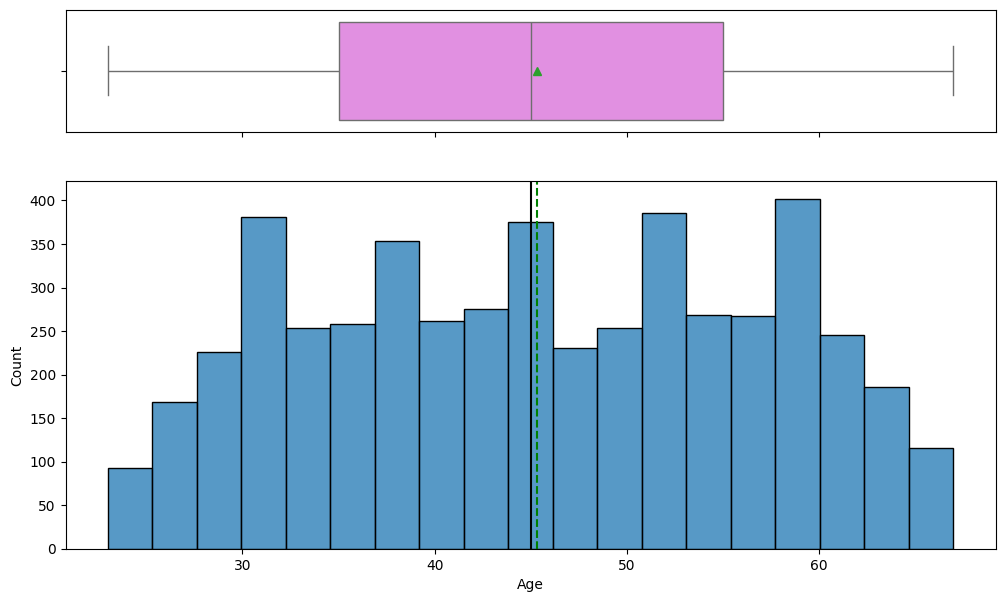

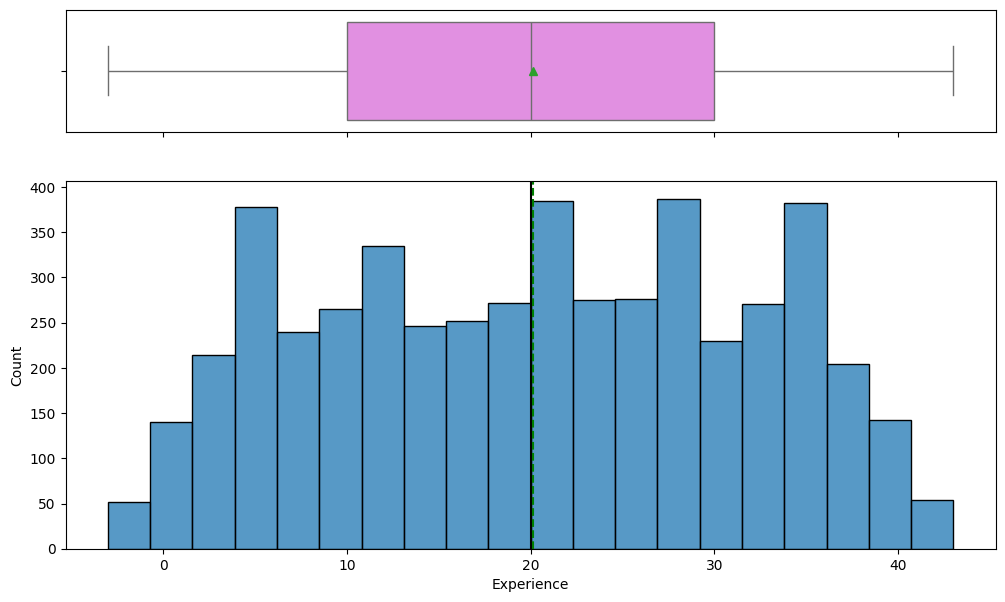

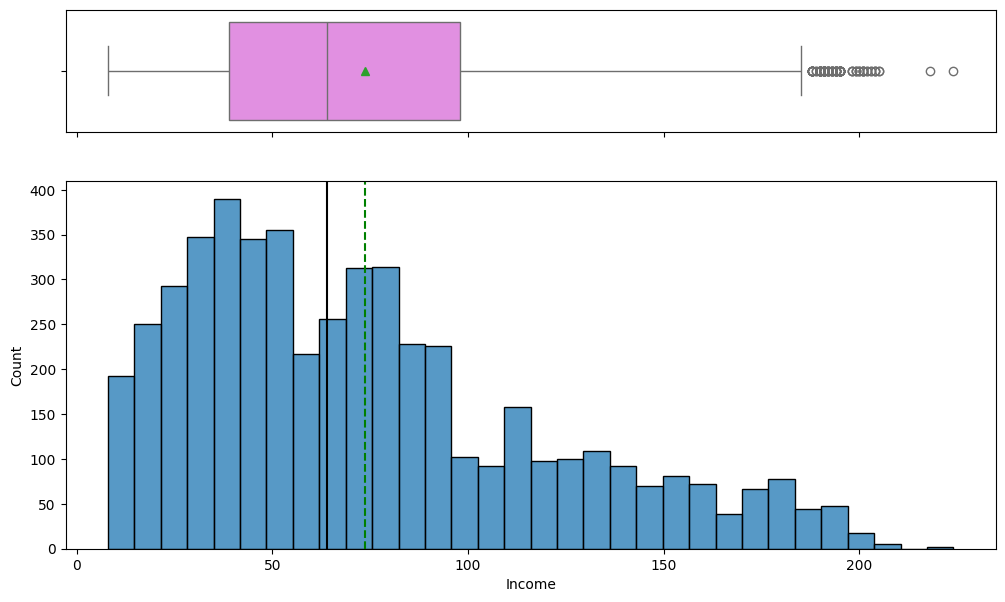

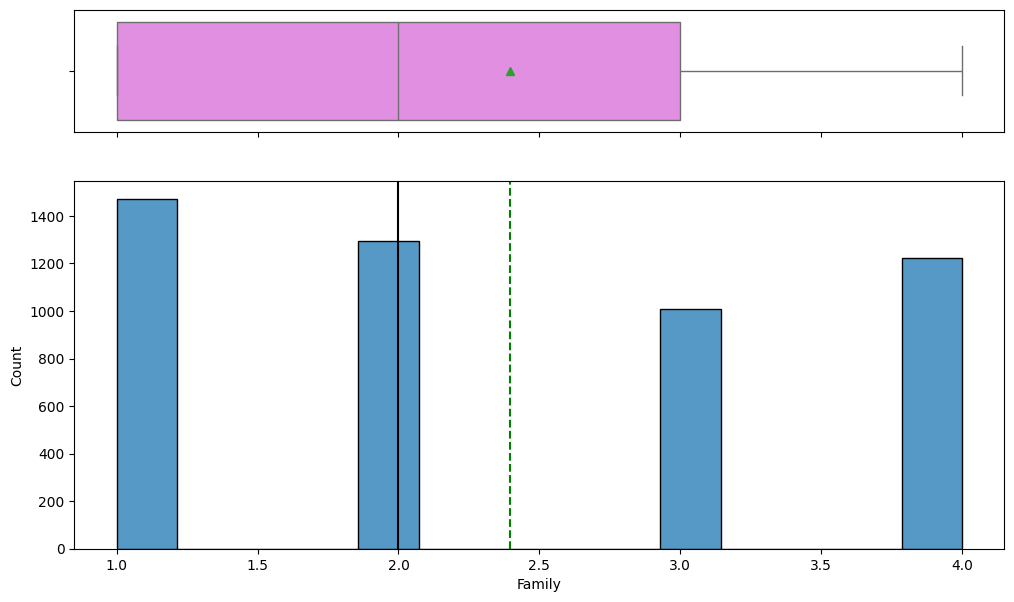

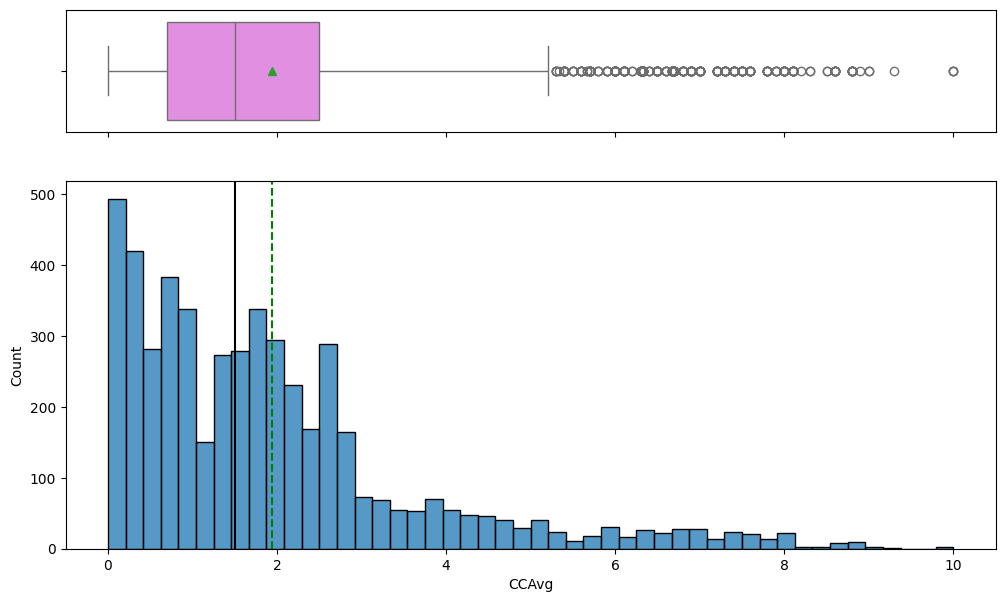

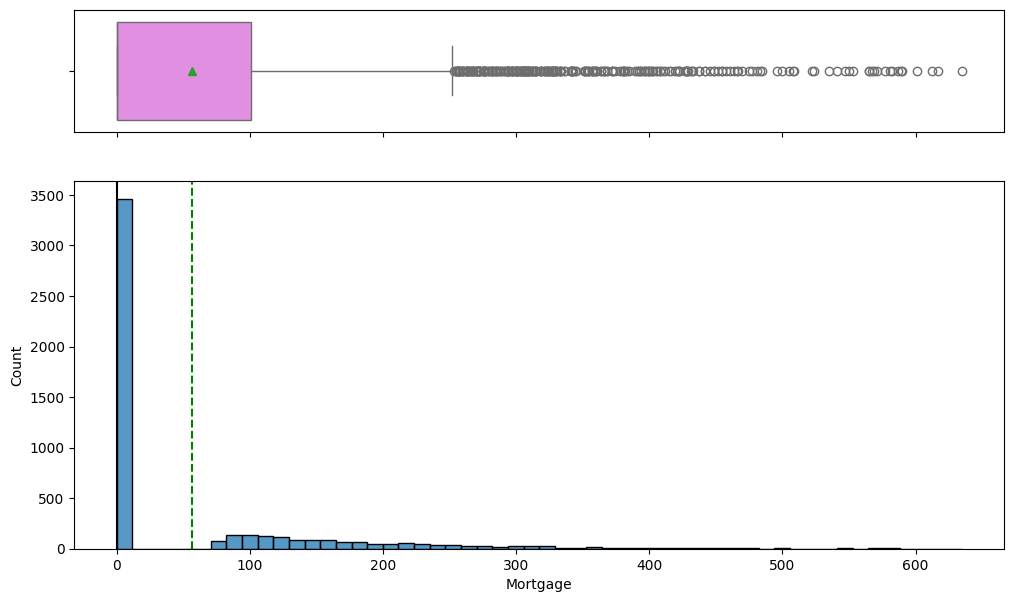

In [16]:
col = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
for i in col:
    histogram_boxplot(data, i)

We find some anomaly in the Experience, we found negative value.

In [17]:
data[data['Experience'] < 0].shape[0]

52

Let's fixe this and explore this problem more

In [18]:
ExpArray = data['Experience'].unique()
print(ExpArray)

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]


In [19]:
data[data['Experience'] == -1].head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
89    25          -1     113    94303       4    2.3          3         0   
226   24          -1      39    94085       2    1.7          2         0   
524   24          -1      75    93014       4    0.2          1         0   
536   25          -1      43    92173       3    2.4          2       176   
540   25          -1     109    94010       4    2.3          3       314   

     Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
89               0                   0           0       0           1  
226              0                   0           0       0           0  
524              0                   0           0       1           0  
536              0                   0           0       1           0  
540              0                   0           0       1           0

In [20]:
data[data['Experience'] == -2].head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
315   24          -2      51    90630       3   0.30          3         0   
451   28          -2      48    94132       2   1.75          3        89   
597   24          -2     125    92835       2   7.20          1         0   
793   24          -2     150    94720       2   2.00          1         0   
889   24          -2      82    91103       2   1.60          3         0   

     Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
315              0                   0           0       1           0  
451              0                   0           0       1           0  
597              0                   1           0       0           1  
793              0                   0           0       1           0  
889              0                   0           0       1           1

In [21]:
data[data['Experience'] == -3].head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
2618   23          -3      55    92704       3    2.4          2       145   
3626   24          -3      28    90089       4    1.0          3         0   
4285   23          -3     149    93555       2    7.2          1         0   
4514   24          -3      41    91768       4    1.0          3         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
2618              0                   0           0       1           0  
3626              0                   0           0       0           0  
4285              0                   0           0       1           0  
4514              0                   0           0       1           0

It seems that some error was introduced in the dataset. Some of the young population have an experience of negative values [-3, -2, -1]. Let's fix this with 1, 2, 3 instead of -1, -2, -3.


In [22]:
data['Experience'].replace(-1, 1, inplace=True)
data['Experience'].replace(-2, 2, inplace=True)
data['Experience'].replace(-3, 3, inplace=True)

In [23]:
data[data['Experience'] < 0].shape[0]

0

Checking now the zip code

In [24]:
ZipArray = data['ZIPCode'].unique()
print(ZipArray)

[91107 90089 94720 94112 91330 92121 91711 93943 93023 94710 90277 93106
 94920 91741 95054 95010 94305 91604 94015 90095 91320 95521 95064 90064
 94539 94104 94117 94801 94035 92647 95814 94114 94115 92672 94122 90019
 95616 94065 95014 91380 95747 92373 92093 94005 90245 95819 94022 90404
 93407 94523 90024 91360 95670 95123 90045 91335 93907 92007 94606 94611
 94901 92220 93305 95134 94612 92507 91730 94501 94303 94105 94550 92612
 95617 92374 94080 94608 93555 93311 94704 92717 92037 95136 94542 94143
 91775 92703 92354 92024 92831 92833 94304 90057 92130 91301 92096 92646
 92182 92131 93720 90840 95035 93010 94928 95831 91770 90007 94102 91423
 93955 94107 92834 93117 94551 94596 94025 94545 95053 90036 91125 95120
 94706 95827 90503 90250 95817 95503 93111 94132 95818 91942 90401 93524
 95133 92173 94043 92521 92122 93118 92697 94577 91345 94123 92152 91355
 94609 94306 96150 94110 94707 91326 90291 92807 95051 94085 92677 92614
 92626 94583 92103 92691 92407 90504 94002 95039 94

In [25]:
print(np.sort(ZipArray))

[90005 90007 90009 90011 90016 90018 90019 90024 90025 90027 90028 90029
 90032 90033 90034 90035 90036 90037 90041 90044 90045 90048 90049 90057
 90058 90059 90064 90065 90066 90068 90071 90073 90086 90089 90095 90210
 90212 90230 90232 90245 90250 90254 90266 90272 90274 90275 90277 90280
 90291 90304 90401 90404 90405 90502 90503 90504 90505 90509 90601 90623
 90630 90638 90639 90640 90650 90717 90720 90740 90745 90747 90755 90813
 90840 91006 91007 91016 91024 91030 91040 91101 91103 91105 91107 91109
 91116 91125 91129 91203 91207 91301 91302 91304 91311 91320 91326 91330
 91335 91342 91343 91345 91355 91360 91361 91365 91367 91380 91401 91423
 91604 91605 91614 91706 91709 91710 91711 91730 91741 91745 91754 91763
 91765 91768 91770 91773 91775 91784 91791 91801 91902 91910 91911 91941
 91942 91950 92007 92008 92009 92024 92028 92029 92037 92038 92054 92056
 92064 92068 92069 92084 92093 92096 92101 92103 92104 92106 92109 92110
 92115 92116 92120 92121 92122 92123 92124 92126 92

Ok we are good on this variable.

We find that a significant number of persons have no Mortgage

In [26]:
data[data['Mortgage']==0].shape[0]

3462

Now we make the "non" numerical columns a category

In [27]:
categoryList = ['Education','Personal_Loan', 'Securities_Account','CD_Account','Online', 'CreditCard','ZIPCode']
data[categoryList] = data[categoryList].astype('category')

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

We have categorical data in the dataset let's find what we can do with them

more functions

In [28]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [29]:
col_a = data.select_dtypes(include='category').columns.tolist()
col_n = data.select_dtypes(exclude='category').columns.tolist()
print(col_a)
print(col_n)


['ZIPCode', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']


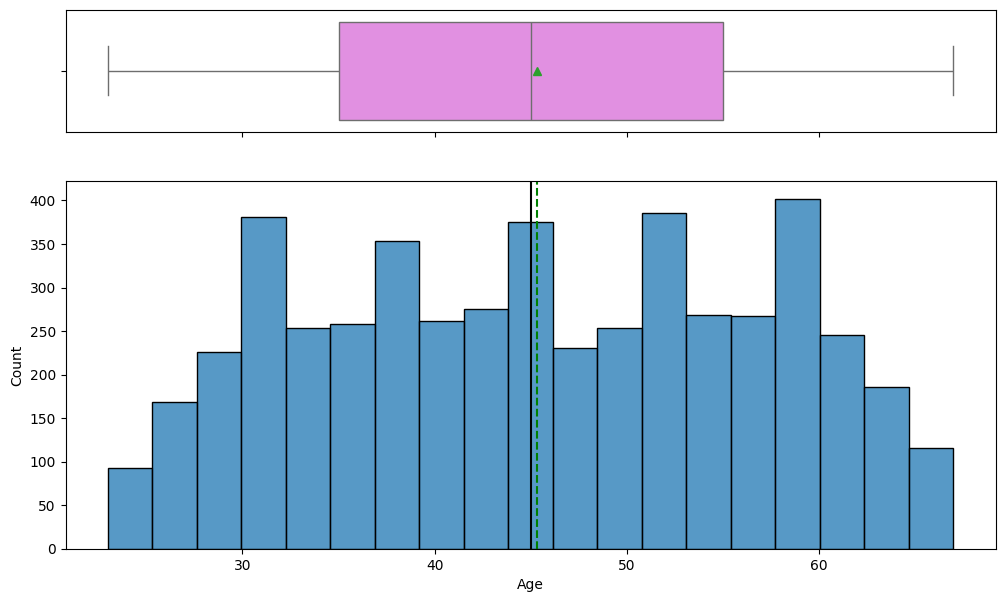

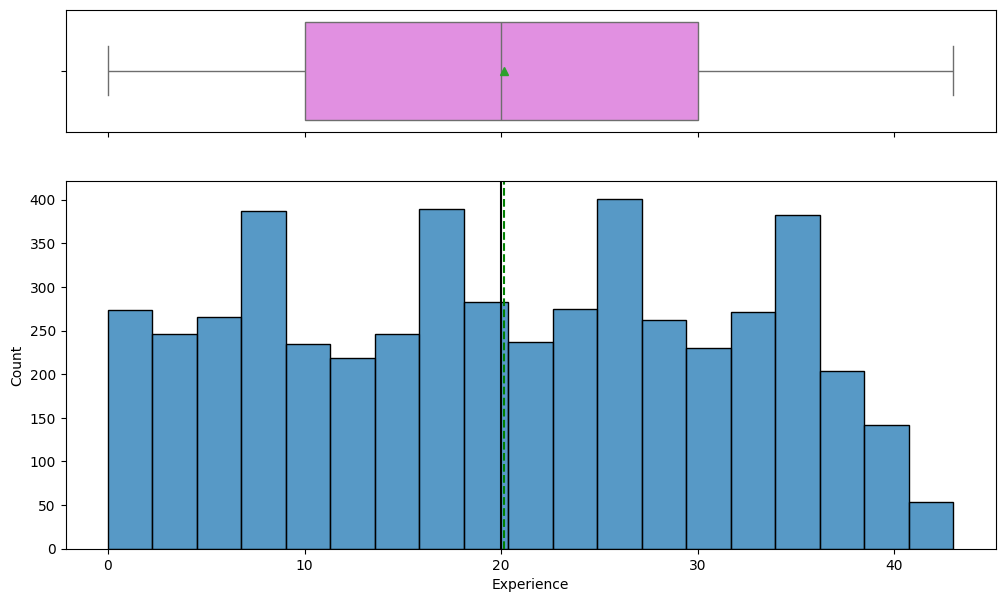

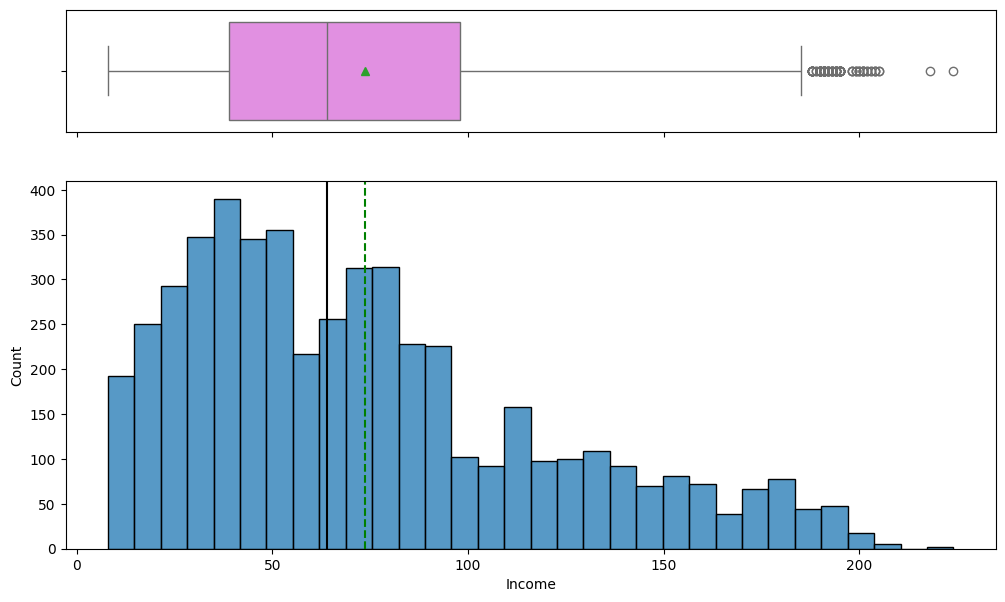

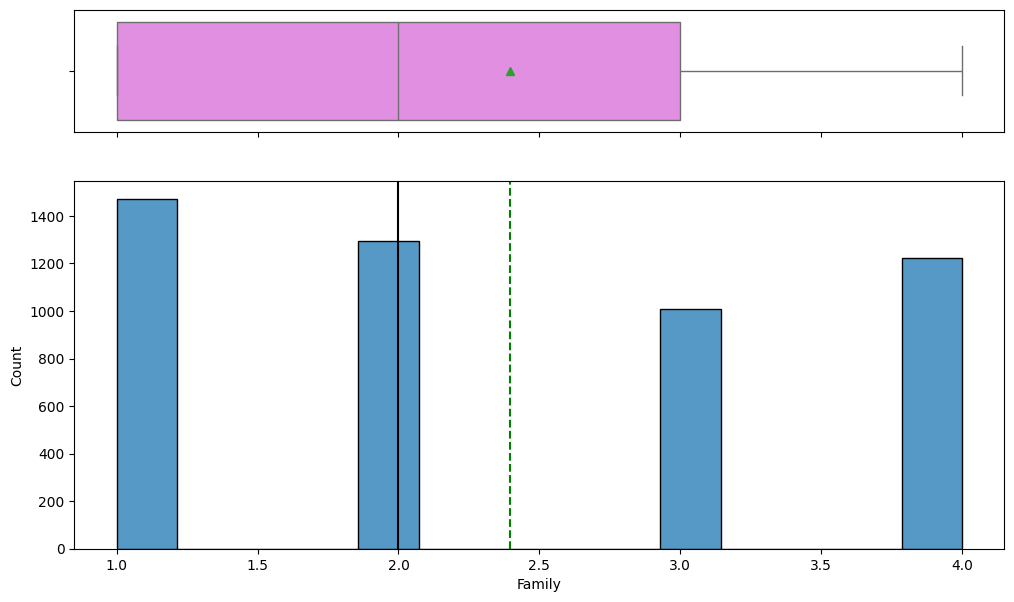

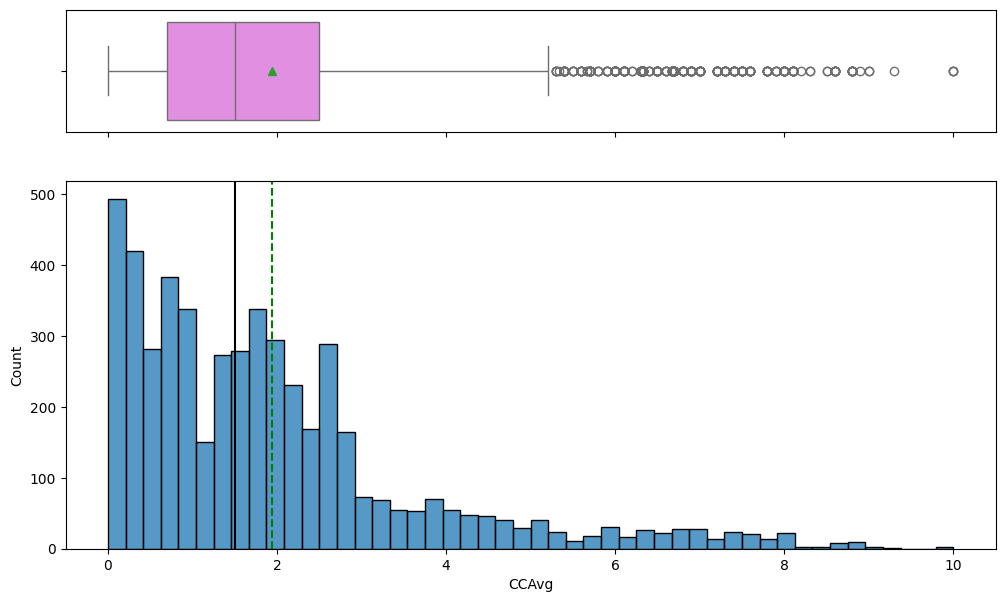

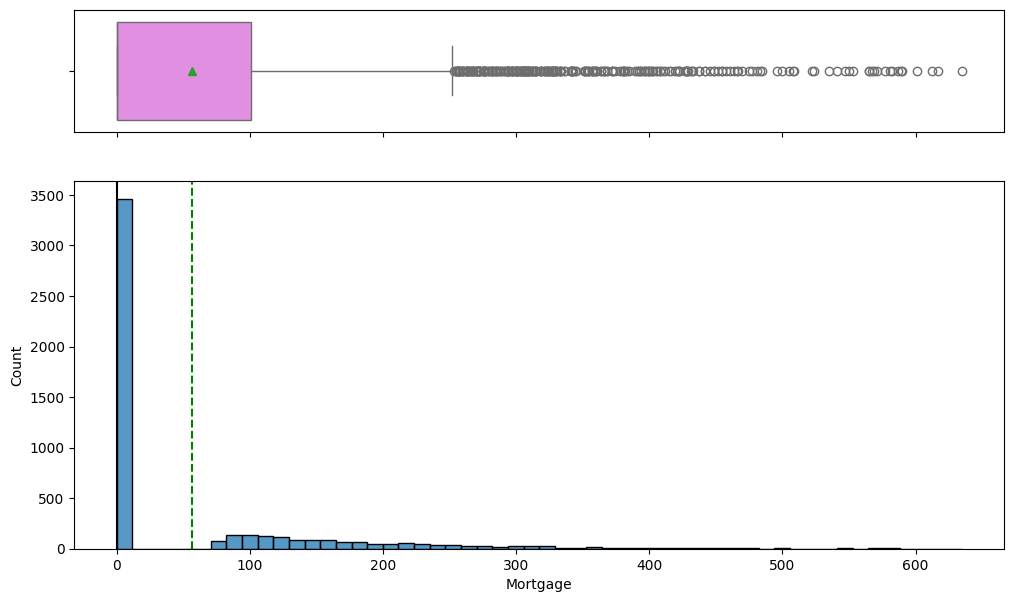

In [30]:
for i in col_n:
    histogram_boxplot(data, i)

## Outlier processing

Since the data set is not large, we choose to capping method, we define an upper and lower threshold.

In [31]:
def outlier_capping(df, var):
  for i in var:
    # Calculate the upper and lower limit
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)

    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[var] = np.where(df[var] > upper, upper, np.where(df[var] < lower, lower, df[var]))

  return df

In [32]:
df = outlier_capping(data, ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'])

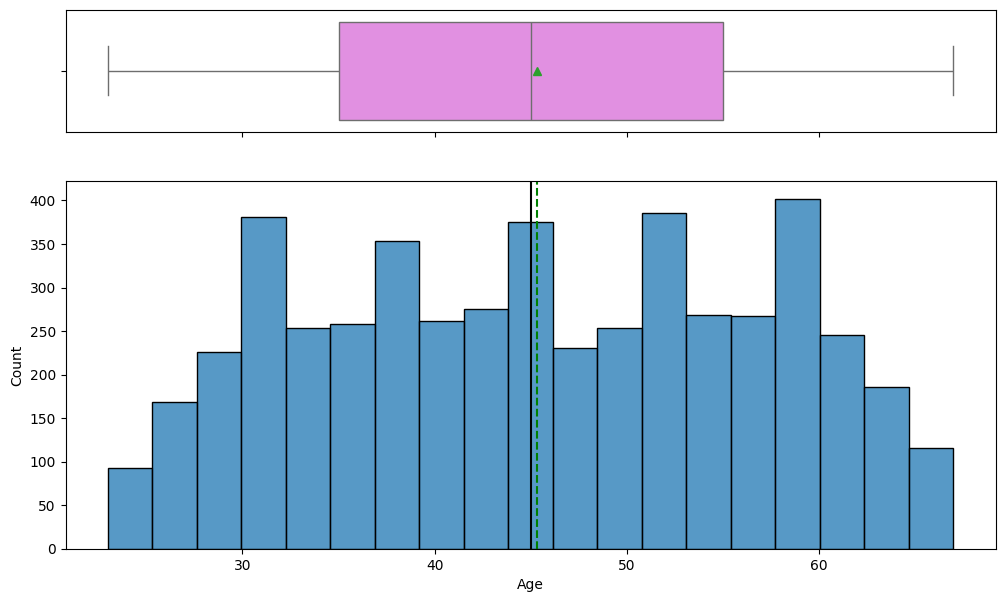

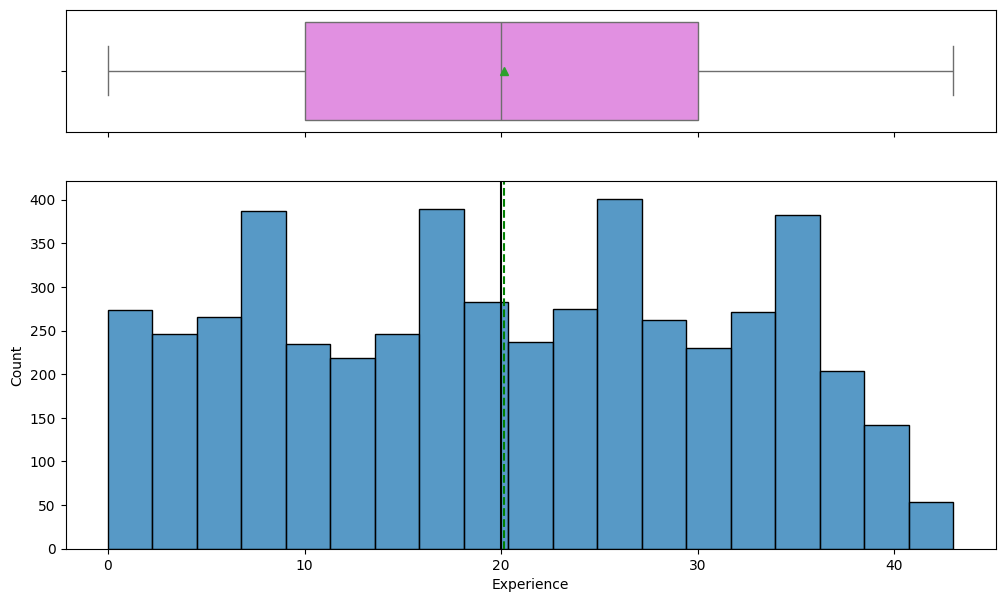

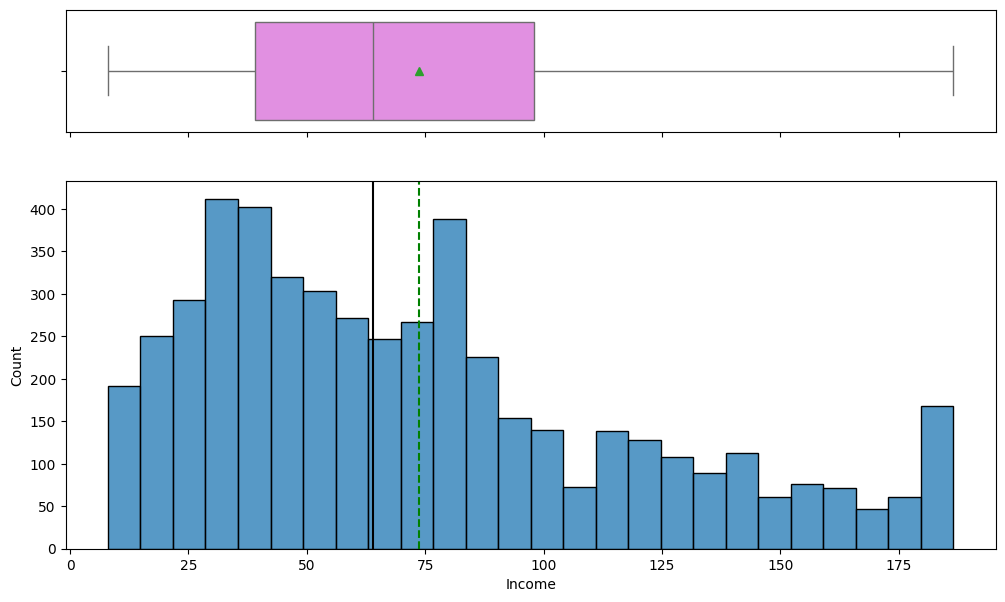

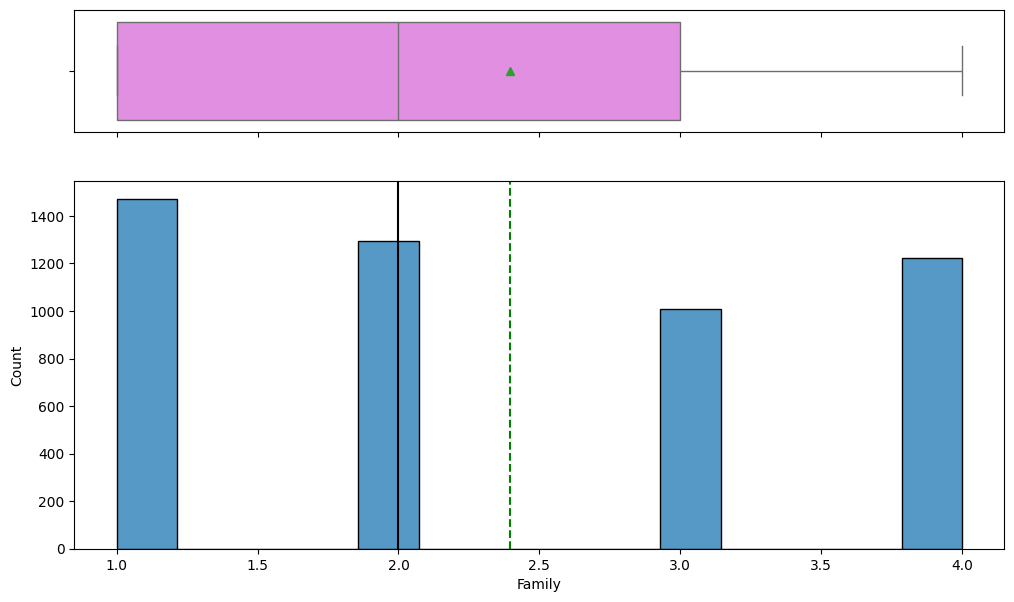

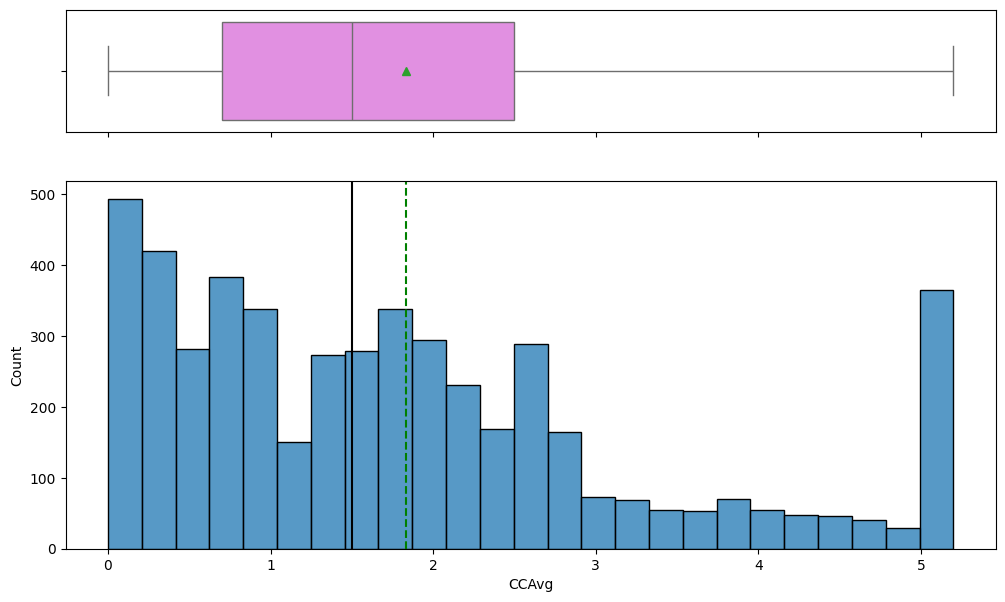

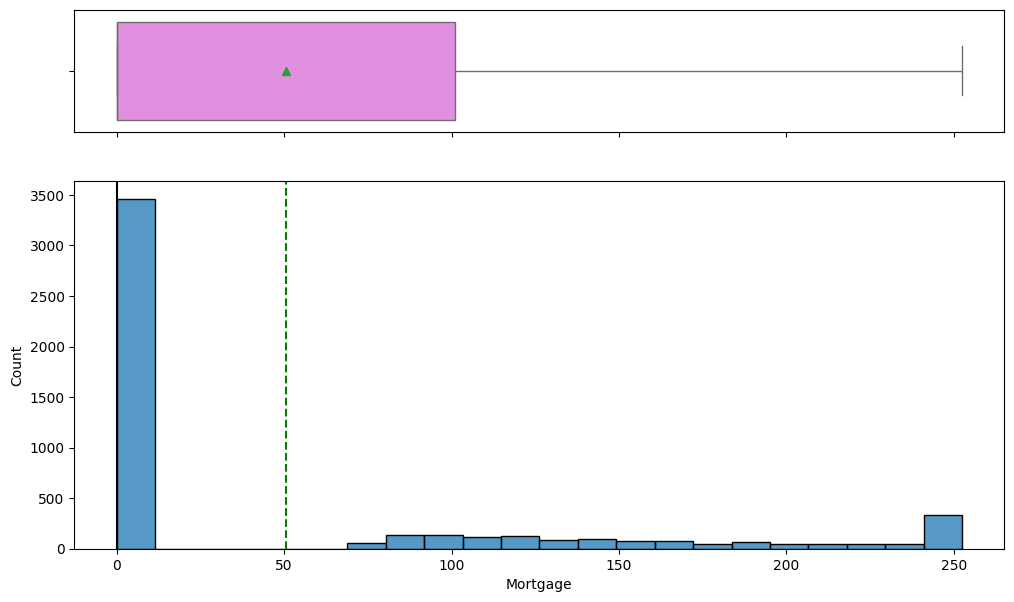

In [33]:
for i in col_n:
    histogram_boxplot(df, i)

After cleaning the outliers we see that the mortgage can be a problem, the population that has no mortgage is important. Let's explore some strategy.

In [34]:
# Separate zero and non-zero values
df['has_mortgage'] = (df['Mortgage'] > 0).astype(int)

# Log transformation for non-zero values
df['log_mortgage'] = np.log1p(df['Mortgage'])

# Winsorization for non-zero values
non_zero_mortgage = df['Mortgage'][df['Mortgage'] > 0]
lower = non_zero_mortgage.quantile(0.01)
upper = non_zero_mortgage.quantile(0.99)

# Apply winsorization directly to the 'Mortgage' column
df['winsorized_mortgage'] = df['Mortgage']
df.loc[df['Mortgage'] > 0, 'winsorized_mortgage'] = df.loc[df['Mortgage'] > 0, 'Mortgage'].clip(lower=lower, upper=upper)




In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   float64 
 1   Experience           5000 non-null   float64 
 2   Income               5000 non-null   float64 
 3   ZIPCode              5000 non-null   category
 4   Family               5000 non-null   float64 
 5   CCAvg                5000 non-null   float64 
 6   Education            5000 non-null   category
 7   Mortgage             5000 non-null   float64 
 8   Personal_Loan        5000 non-null   category
 9   Securities_Account   5000 non-null   category
 10  CD_Account           5000 non-null   category
 11  Online               5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  has_mortgage         5000 non-null   int64   
 14  log_mortgage         5000 non-null   float64 
 15  winsorized_mortgage  

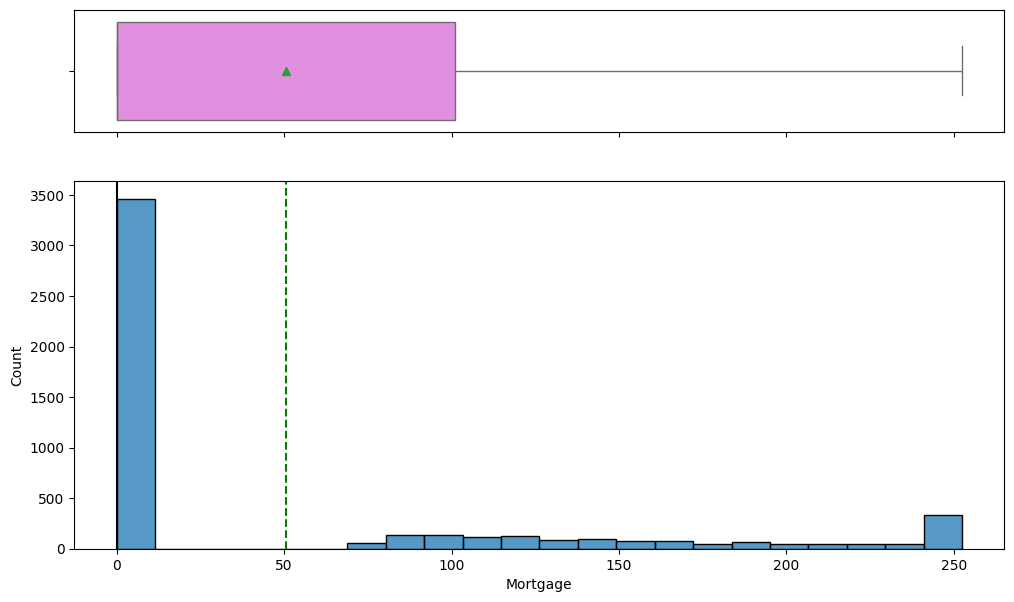

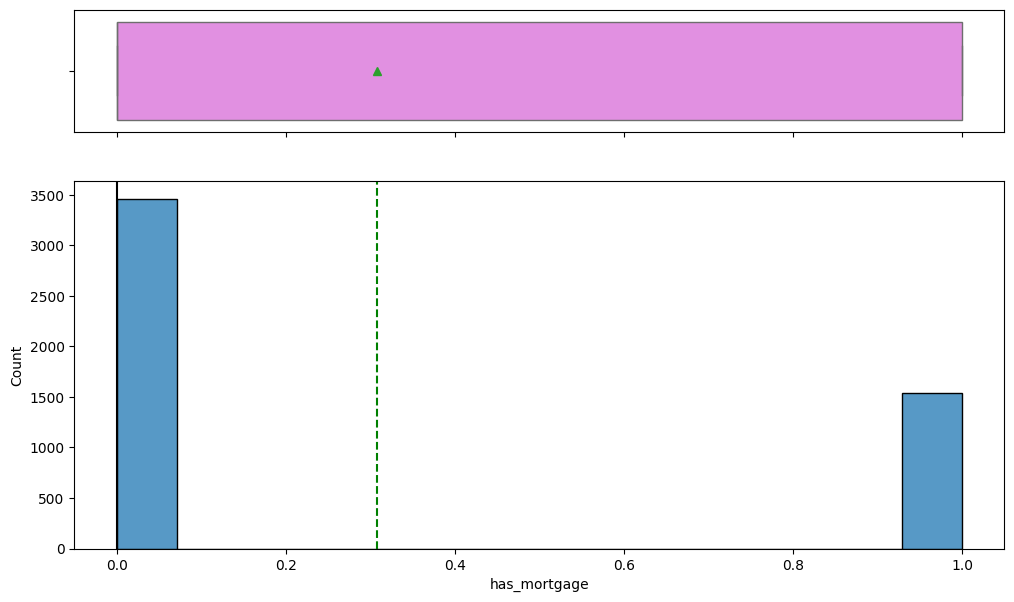

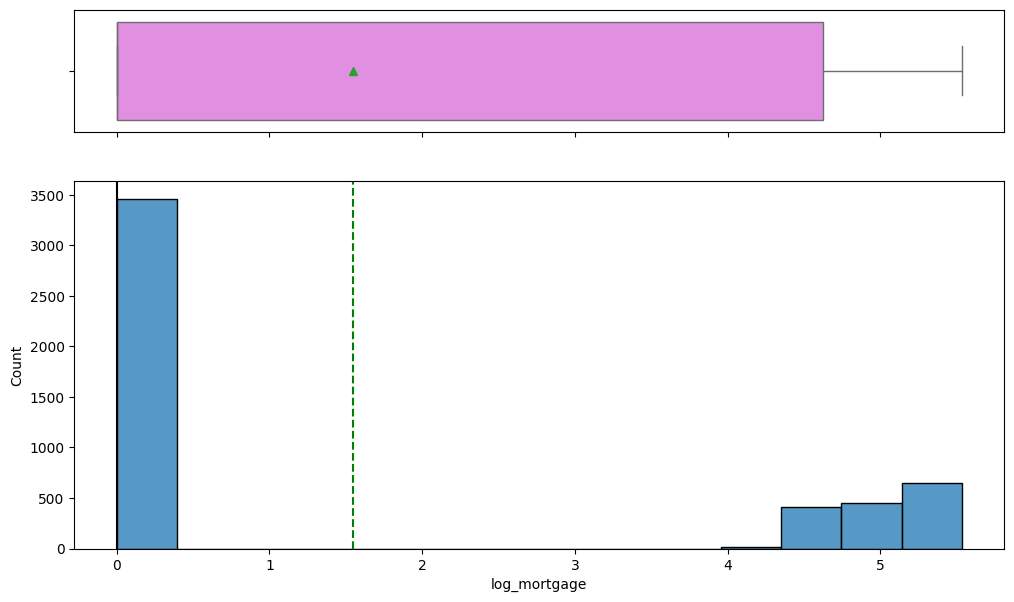

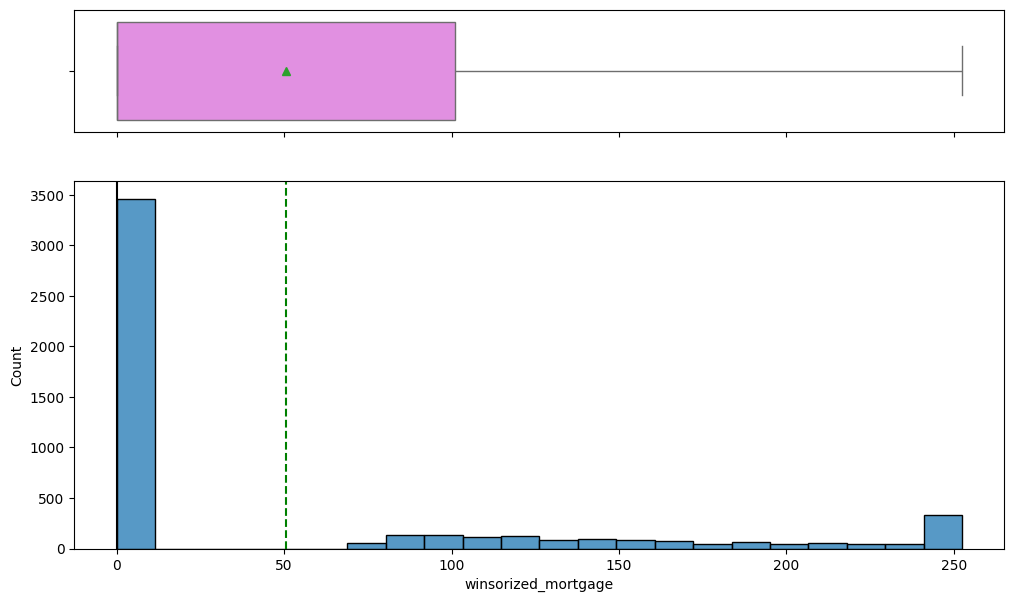

In [36]:
for i in ['Mortgage', 'has_mortgage','log_mortgage','winsorized_mortgage']:
    histogram_boxplot(df, i)


In [37]:
df['has_mortgage'] = df['has_mortgage'].astype('category')

In [38]:
col_a.append('has_mortgage')

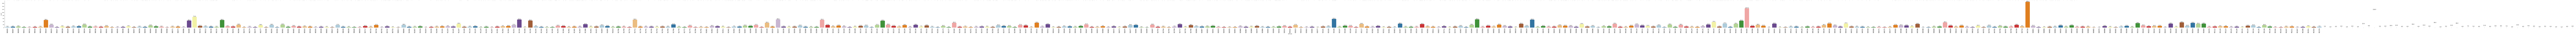

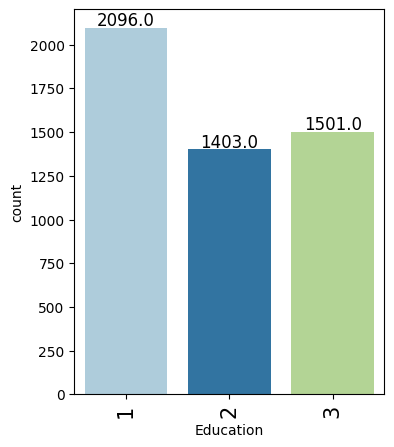

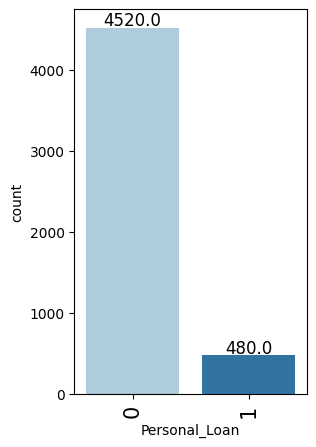

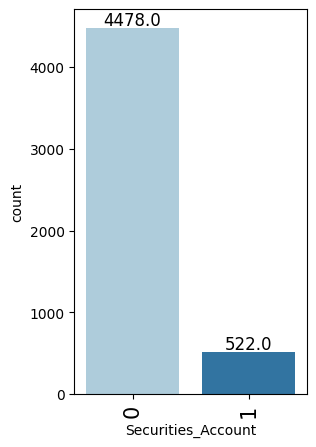

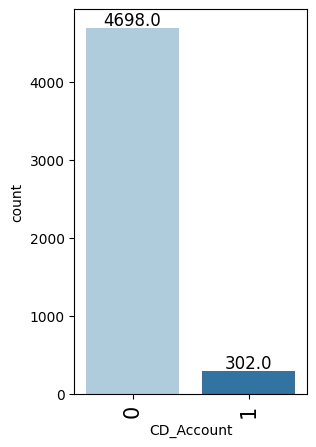

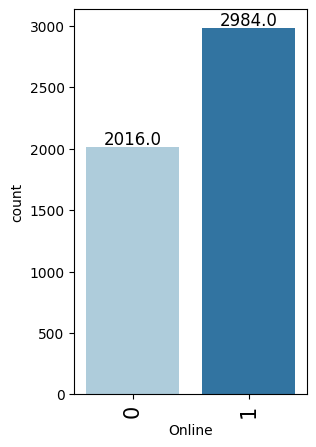

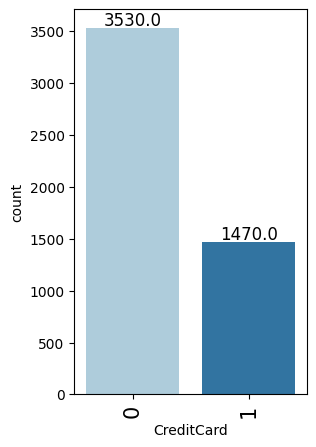

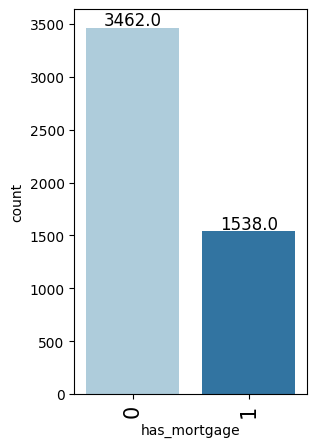

In [39]:
for i in col_a:
    labeled_barplot(df, i)

Let's check correlation between numerical value

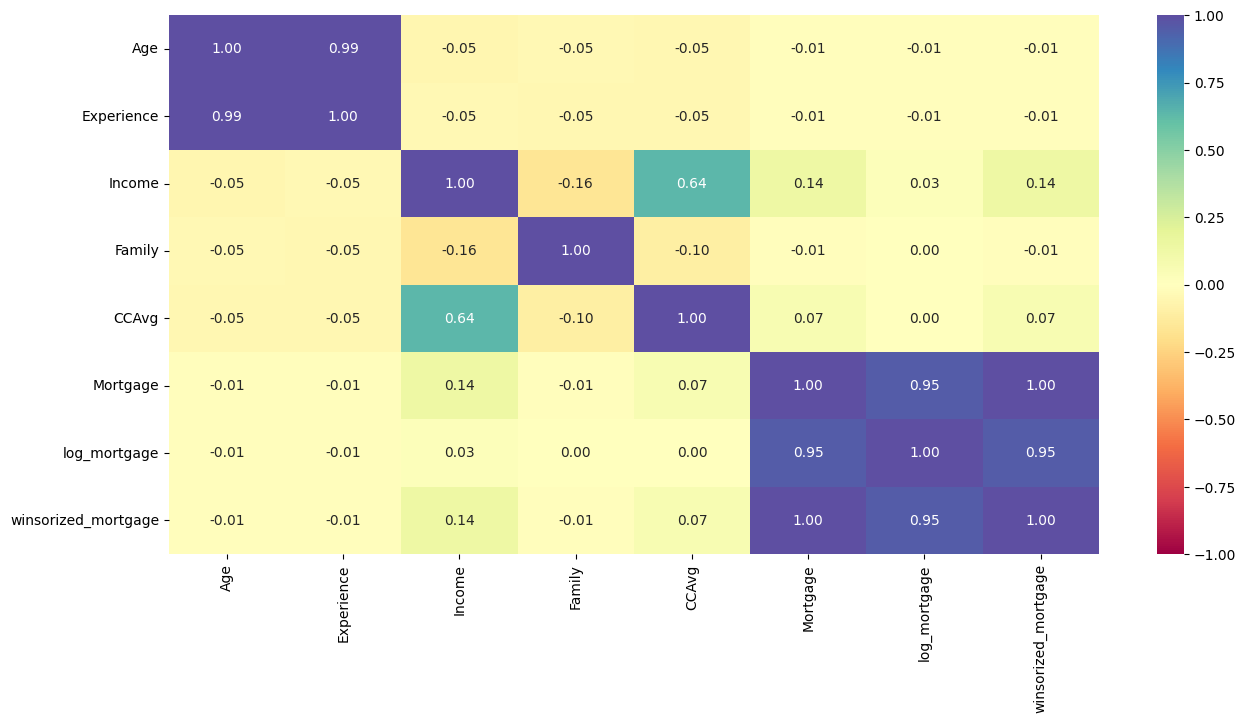

In [40]:
dataCorr = data[data.select_dtypes(include='number').columns.tolist()]
plt.figure(figsize=(15, 7))
sns.heatmap(dataCorr.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


1.   The high correlation between Mortgage, log_mortgage and winsorized_mortgage is no surprise as they re the same (Mortgage, winsorized_mortgage) the log_mortgage is just a log representation of the Mortage.
2.   there is a high correlation between Age and Experience, which fundamentally is not surprising, as experience comes with age.
3.  The CCAvg is highly correlated with the income, which is also understandable
4.  The last correlation that is worth noting is the Family/Income but it's not as high



Multivariable analysis

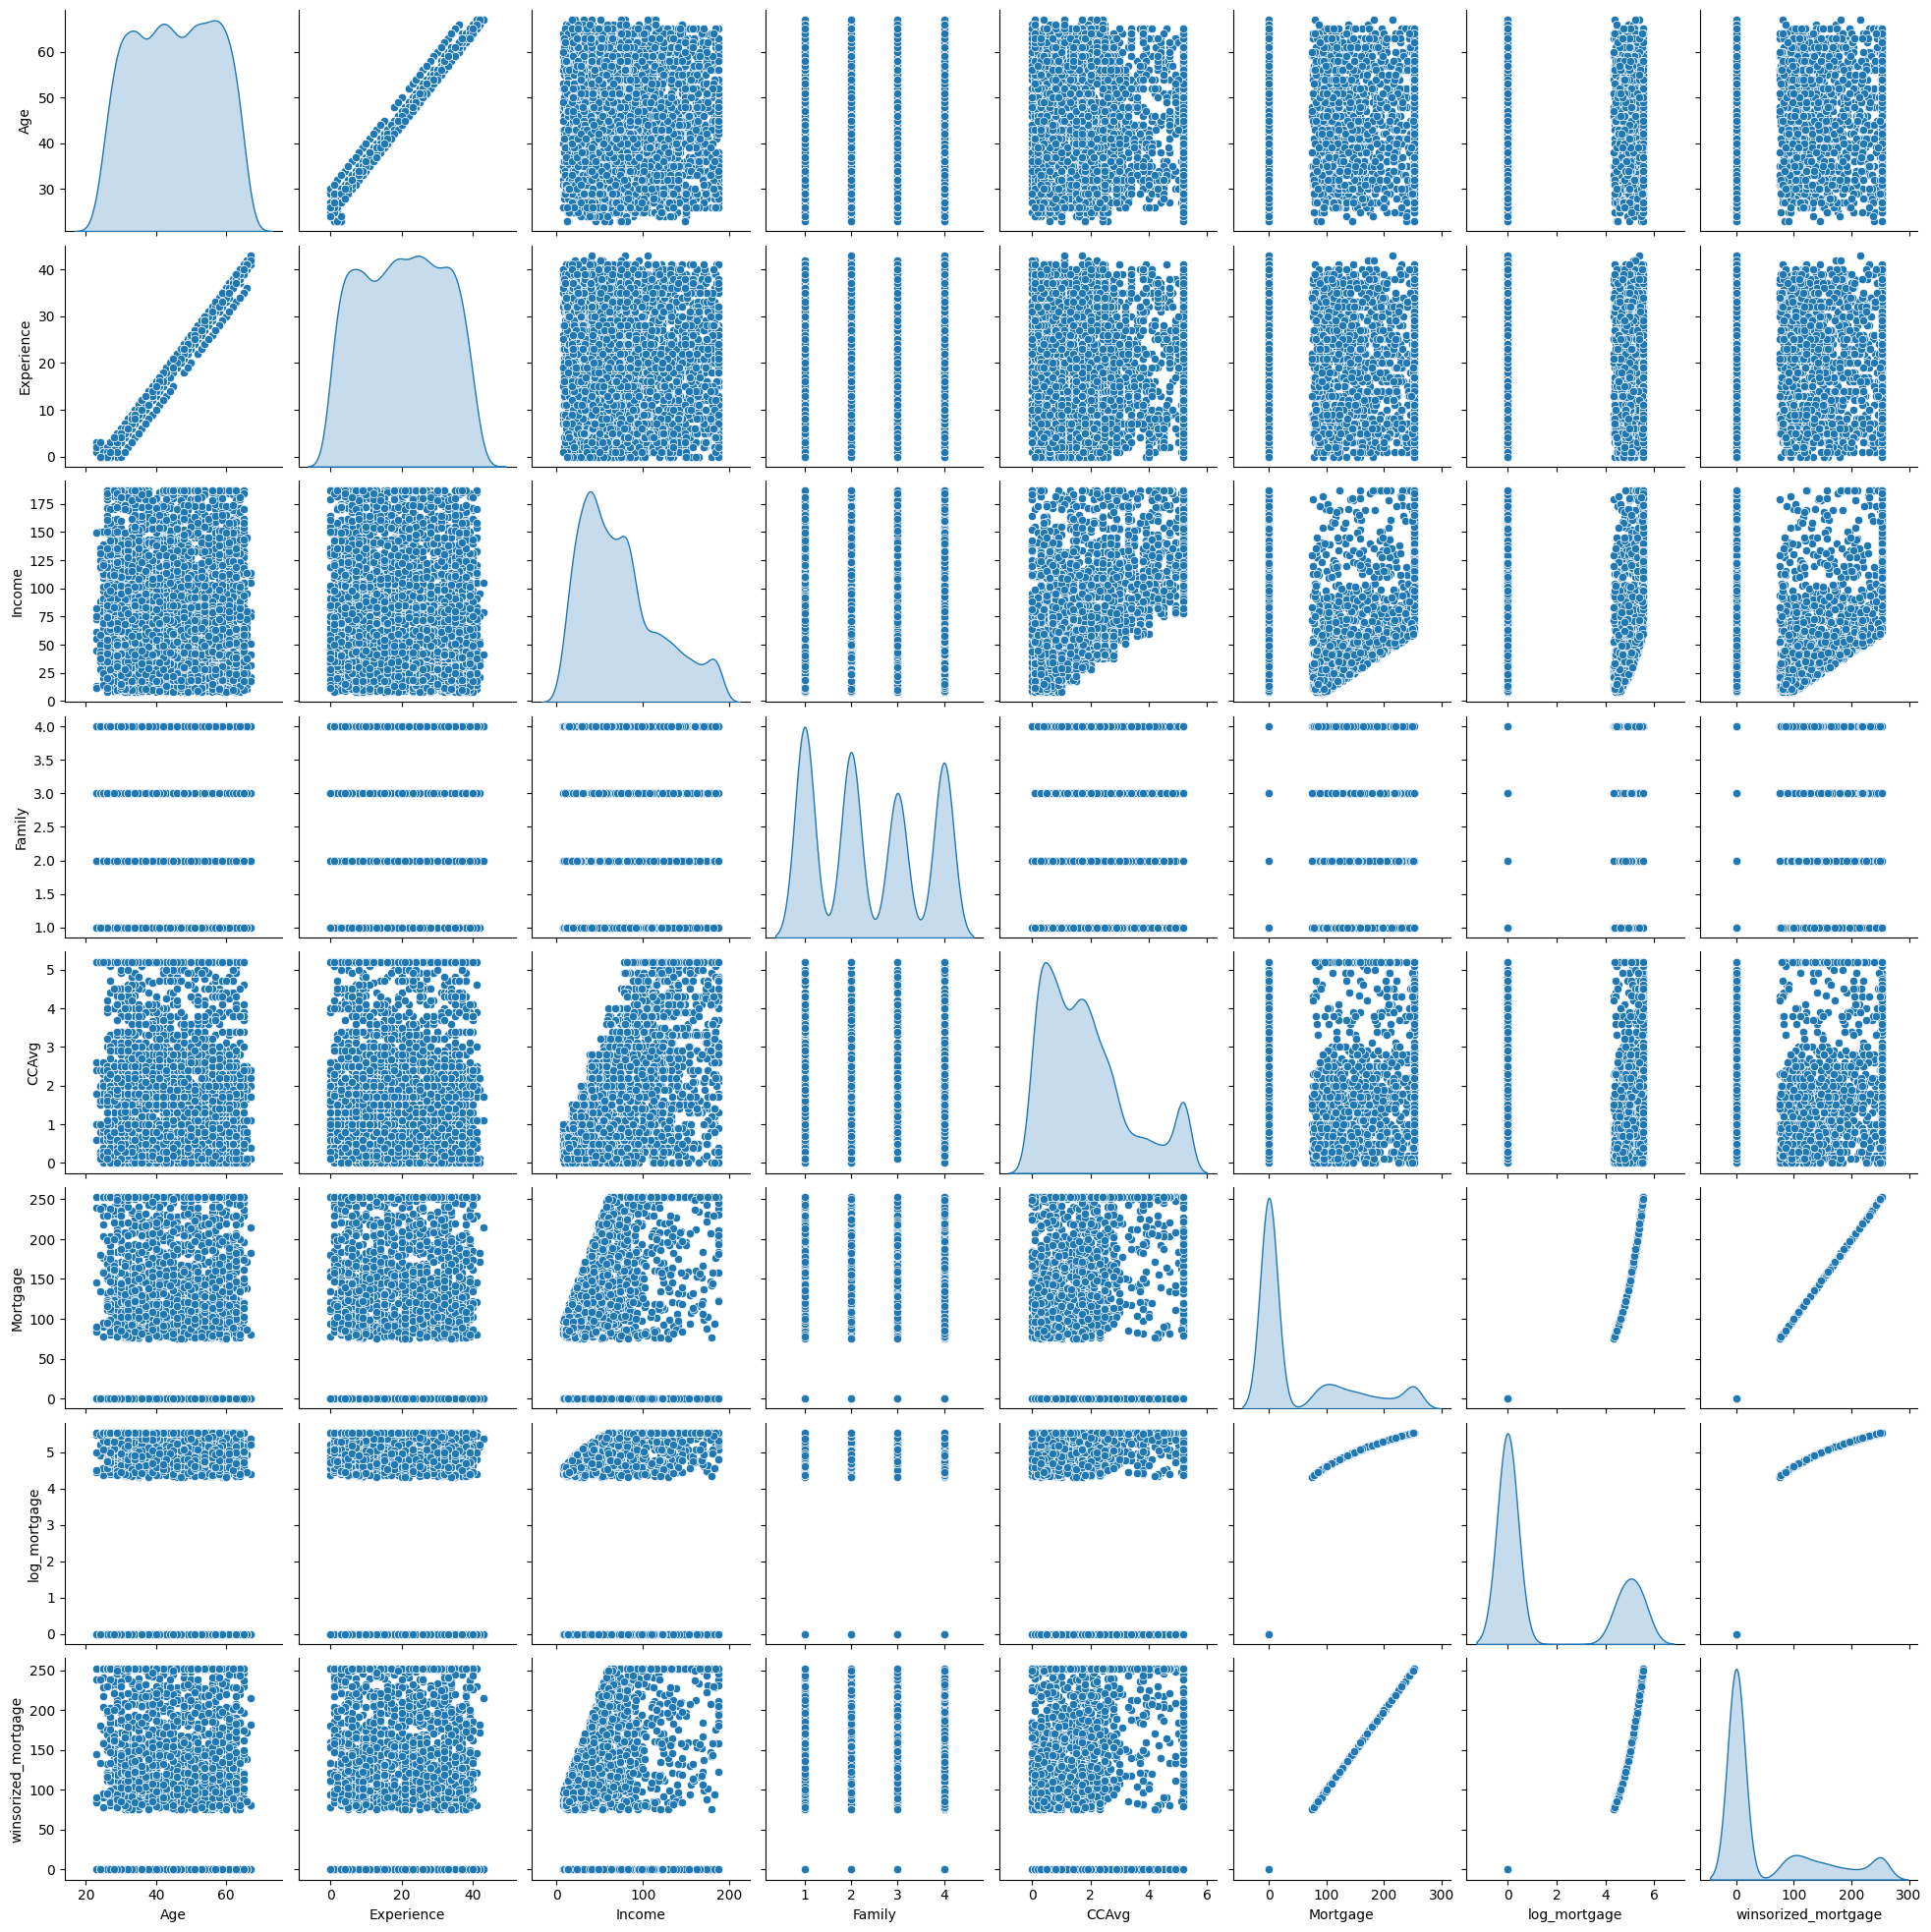

In [41]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

This is interesting to note that log_mortgage might be better to use as it gives a clear separation between the population that has mortgage or not

Finally let's see where the zip are located

In [42]:
!pip install uszipcode

In [43]:
pip install sqlalchemy_mate==2.0.0.0

In [44]:
!pip install pgeocode folium

In [48]:
!pip install pgeocode

In [42]:

from uszipcode import SearchEngine
import folium
import pgeocode

In [43]:
# copy the data
dfMap = df.copy()

# Make the zipcode as string
dfMap['ZIPCode'] = df['ZIPCode'].astype(str)

# Debug: Check the dataframe after conversion
print("DataFrame after converting ZIPCode to string:\n", dfMap.info())

### once the data are ready let's try to display these Zipcode
# Create a pgeocode instance
nomi = pgeocode.Nominatim('us')

# Function to get latitude and longitude for a given zip code
def get_lat_long(zipcode):
    location = nomi.query_postal_code(zipcode)
    if location is not None and not pd.isna(location['latitude']) and not pd.isna(location['longitude']):
        return location['latitude'], location['longitude']
    else:
        return None, None

# Apply the function to get coordinates for each zip code in the dataset
lat_long_series = dfMap['ZIPCode'].apply(lambda x: pd.Series(get_lat_long(x), index=['Latitude', 'Longitude']))

# Debug: Check the new DataFrame with latitudes and longitudes
print("DataFrame with Latitude and Longitude:\n", lat_long_series)

# Concatenate the original DataFrame with the new DataFrame
dfMap = pd.concat([dfMap, lat_long_series], axis=1)

# Debug: Check the dataframe after concatenation
print("DataFrame after concatenation:\n", dfMap)

# Initialize a folium map centered at an average location
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Coordinates for the geographical center of the US

# Add markers to the map
for _, row in dfMap.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=f"ZIPCode: {row['ZIPCode']}").add_to(us_map)

# Save the map to an HTML file
map_filename = "us_zipcode_map.html"
us_map.save(map_filename)

# Display the HTML map in the Colab notebook
# IFrame(src=map_filename, width=700, height=500)
us_map

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   float64 
 1   Experience           5000 non-null   float64 
 2   Income               5000 non-null   float64 
 3   ZIPCode              5000 non-null   object  
 4   Family               5000 non-null   float64 
 5   CCAvg                5000 non-null   float64 
 6   Education            5000 non-null   category
 7   Mortgage             5000 non-null   float64 
 8   Personal_Loan        5000 non-null   category
 9   Securities_Account   5000 non-null   category
 10  CD_Account           5000 non-null   category
 11  Online               5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  has_mortgage         5000 non-null   category
 14  log_mortgage         5000 non-null   float64 
 15  winsorized_mortgage  

The geolocation of the the customers seems intersesting.

Let use what the Zipcode can brings us as a category, le's use the second and third digit (from the right) that designate the sectional center or large cityp Post Office (https://www.smarty.com/articles/zip-4-code)

In [44]:
df['sectional_center'] = df['ZIPCode'].apply(lambda x: int(str(x)[1:3]))

In [45]:
df['sectional_center'] = df['sectional_center'].astype('category')

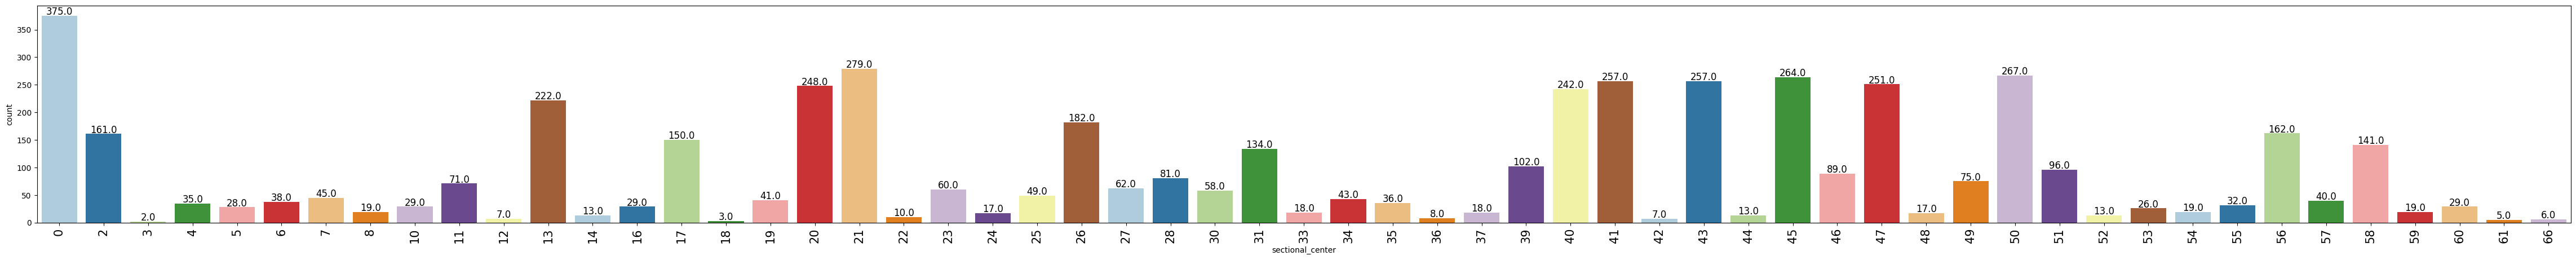

In [46]:
labeled_barplot(df, 'sectional_center')

## Model Building

The make a copy of df to m_df and clean/scale/normilize some data

In [47]:
mdf = df.copy()

In [48]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   float64 
 1   Experience           5000 non-null   float64 
 2   Income               5000 non-null   float64 
 3   ZIPCode              5000 non-null   category
 4   Family               5000 non-null   float64 
 5   CCAvg                5000 non-null   float64 
 6   Education            5000 non-null   category
 7   Mortgage             5000 non-null   float64 
 8   Personal_Loan        5000 non-null   category
 9   Securities_Account   5000 non-null   category
 10  CD_Account           5000 non-null   category
 11  Online               5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  has_mortgage         5000 non-null   category
 14  log_mortgage         5000 non-null   float64 
 15  winsorized_mortgage  

We are dropping corolated colomns and we drop the Mortgage vs. the log_mortgage and see what's happening. We drop ZIPCode in favor of the sectional_center

In [49]:
X = mdf.drop(['Personal_Loan', 'Experience','Mortgage', 'winsorized_mortgage','ZIPCode'], axis=1)
Y = mdf['Personal_Loan']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [51]:
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

X_train.shape :  (3500, 12)
X_test.shape :  (1500, 12)
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


### Model Building

In [52]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [53]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.978


In [54]:
#Checking number of positives
Y.value_counts(1)

Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

In [55]:
y_train.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [56]:
## Function to create confusion matrix
def make_confusion_matrix(model,X_actual,y_actual):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_actual)
    cm=confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [57]:
## Function to measure key parameter (accuracy, recall, F1)
def model_performance(model, X_actual, y_actual):
    '''
    Function to compute accuracy, prcision and recall
    model
    X_actual: actual data set to run the prediction to
    y_actual: the real traget
    '''
    
    # prediction the data
    pred = model.predict(X_actual)
    
    acc = accuracy_score(y_actual, pred)
    recall = recall_score(y_actual, pred)
    f1 = f1_score(y_actual, pred)
    
    return acc, recall, f1

In [58]:
##  Function to calculate recall score
def get_recall_score(model, X_train, X_test):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", recall_score(y_train,pred_train))
    print("Recall on test set : ", recall_score(y_test,pred_test))

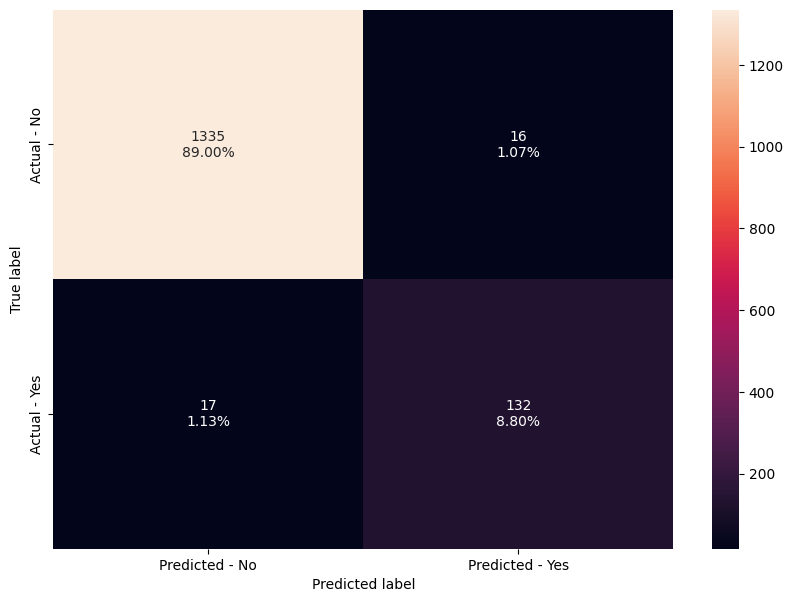

In [59]:
make_confusion_matrix(dTree,X_test,y_test)


In [60]:
acc, recall, f1 = model_performance(dTree,X_train,y_train)
print("Accuracy: ", acc)
print("Recall: ", recall)
print("F1 score: ", f1)

Accuracy:  1.0
Recall:  1.0
F1 score:  1.0


In [61]:
# Recall on train and test
get_recall_score(dTree,X_train, X_test)

Recall on training set :  1.0
Recall on test set :  0.8859060402684564


In [62]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'has_mortgage', 'log_mortgage', 'sectional_center']


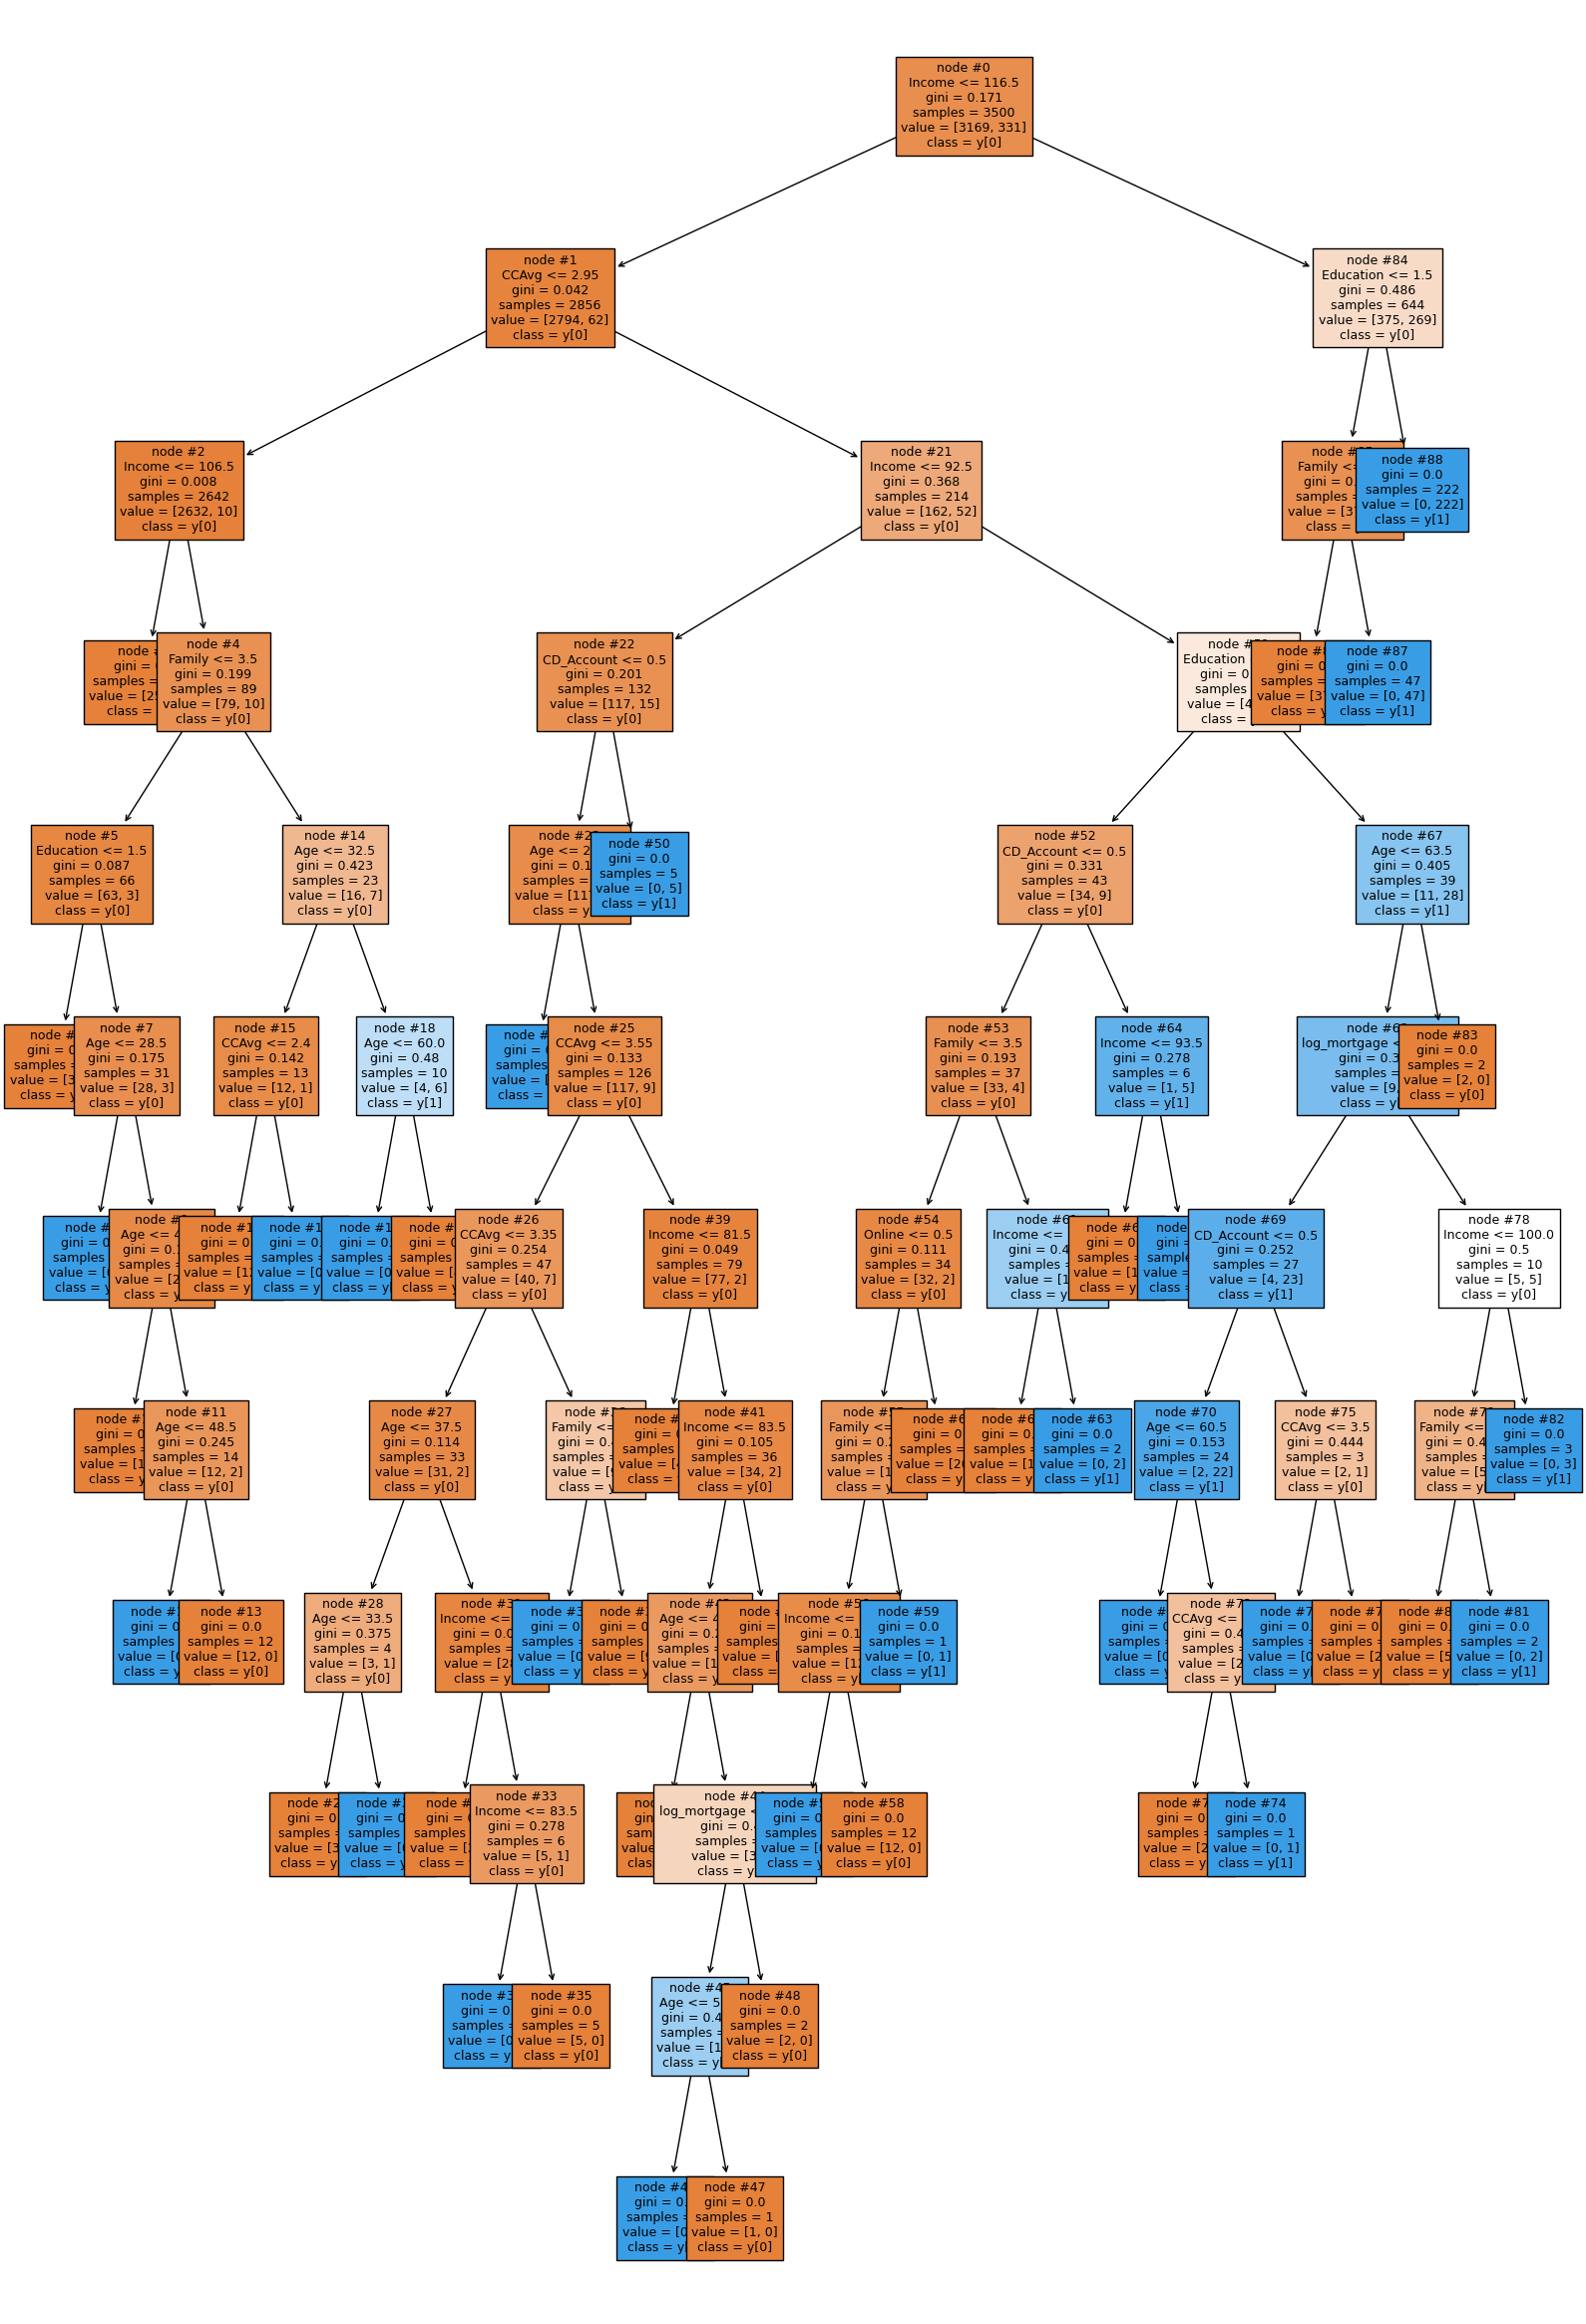

In [63]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [64]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.401465
Income              0.313641
Family              0.164704
CCAvg               0.049712
Age                 0.039412
CD_Account          0.025711
log_mortgage        0.004794
Online              0.000561
Securities_Account  0.000000
CreditCard          0.000000
has_mortgage        0.000000
sectional_center    0.000000


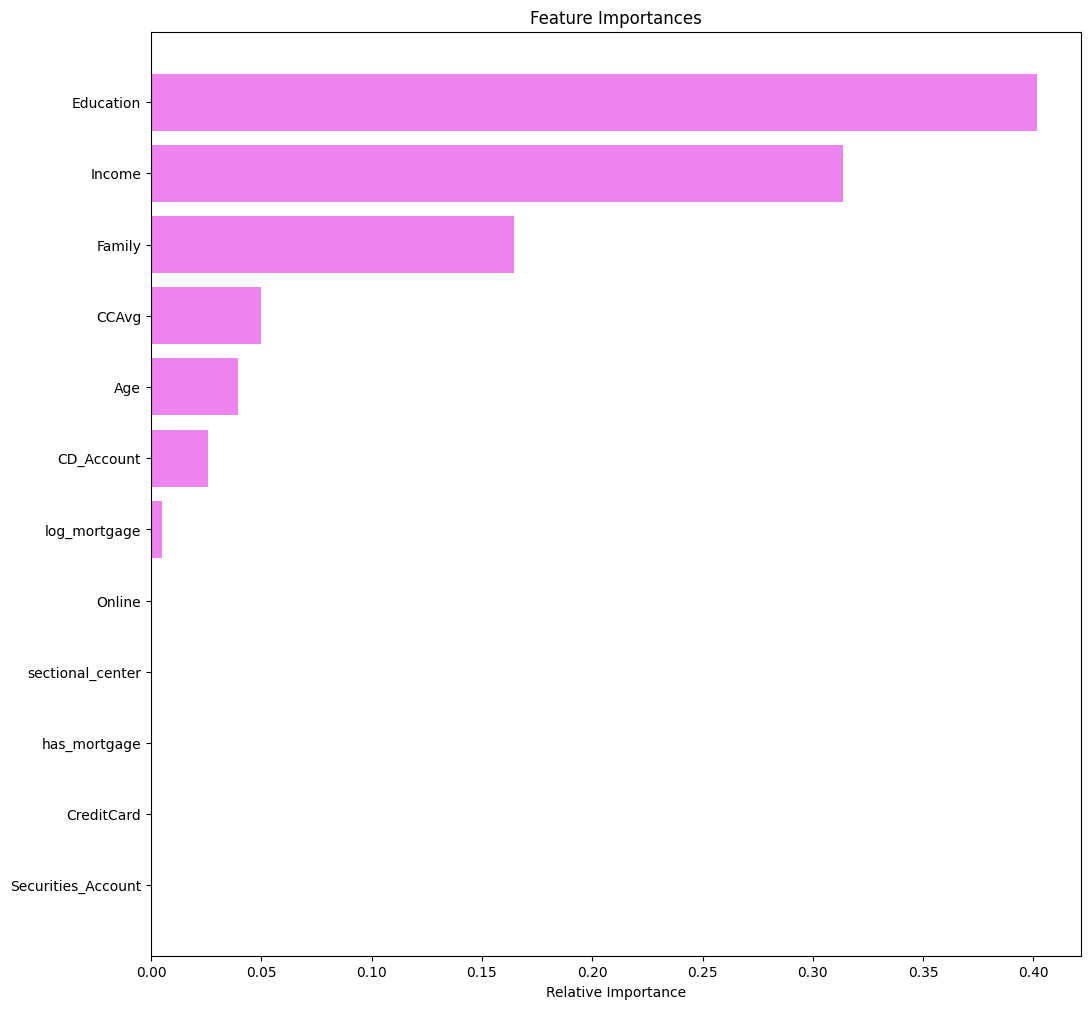

In [65]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Using GridSearch for Hyperparameter tuning of our tree model

### Model Performance Improvement

In [66]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

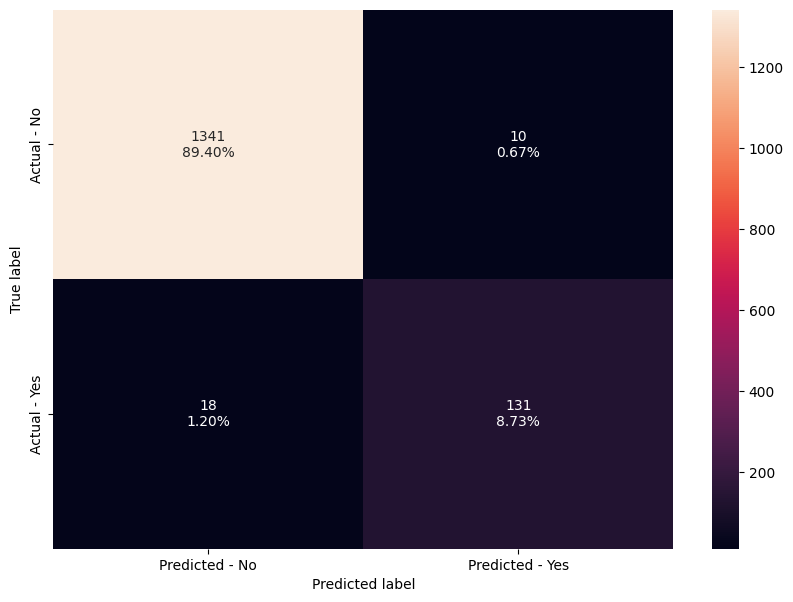

In [67]:
make_confusion_matrix(estimator,X_test,y_test)

In [68]:
acc, recall, f1 = model_performance(dTree,X_train,y_train)
print("Accuracy: ", acc)
print("Recall: ", recall)
print("F1 score: ", f1)

Accuracy:  1.0
Recall:  1.0
F1 score:  1.0


In [69]:
# Recall on train and test
get_recall_score(estimator,X_train, X_test)

Recall on training set :  0.9274924471299094
Recall on test set :  0.8791946308724832


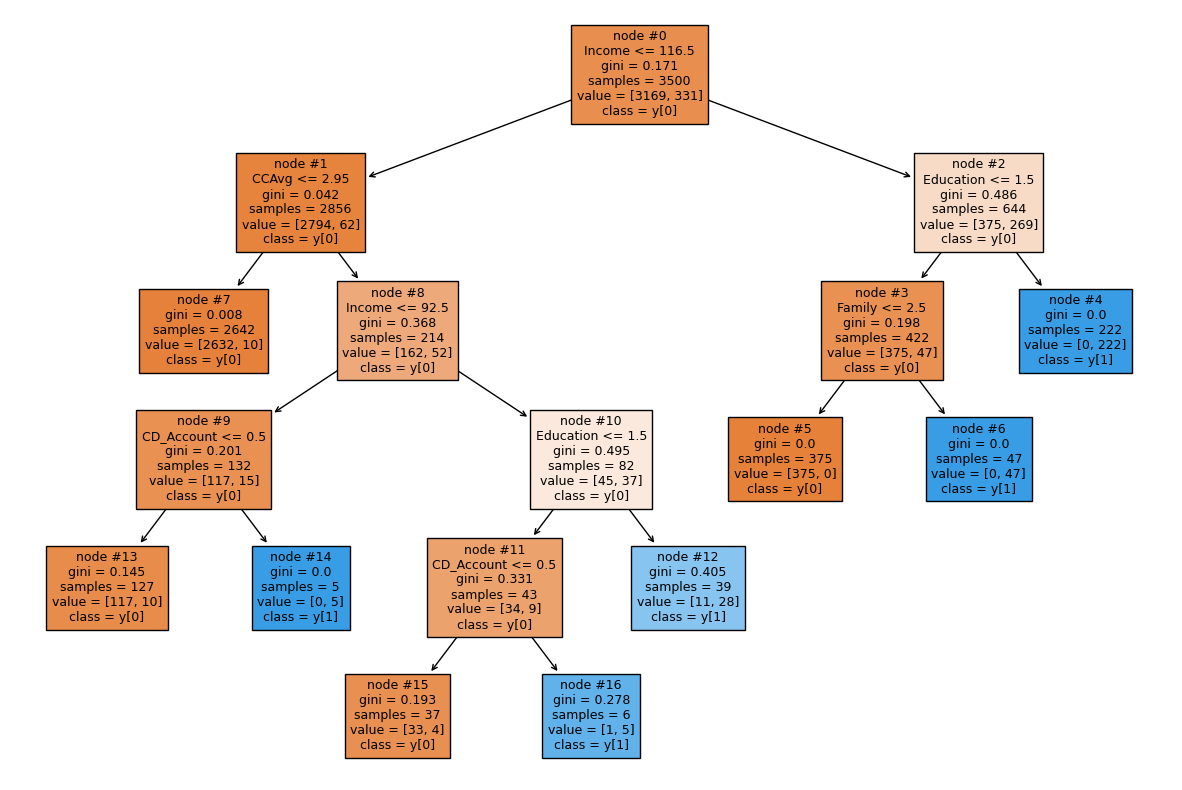

In [70]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [71]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.401465
Income              0.313641
Family              0.164704
CCAvg               0.049712
Age                 0.039412
CD_Account          0.025711
log_mortgage        0.004794
Online              0.000561
Securities_Account  0.000000
CreditCard          0.000000
has_mortgage        0.000000
sectional_center    0.000000


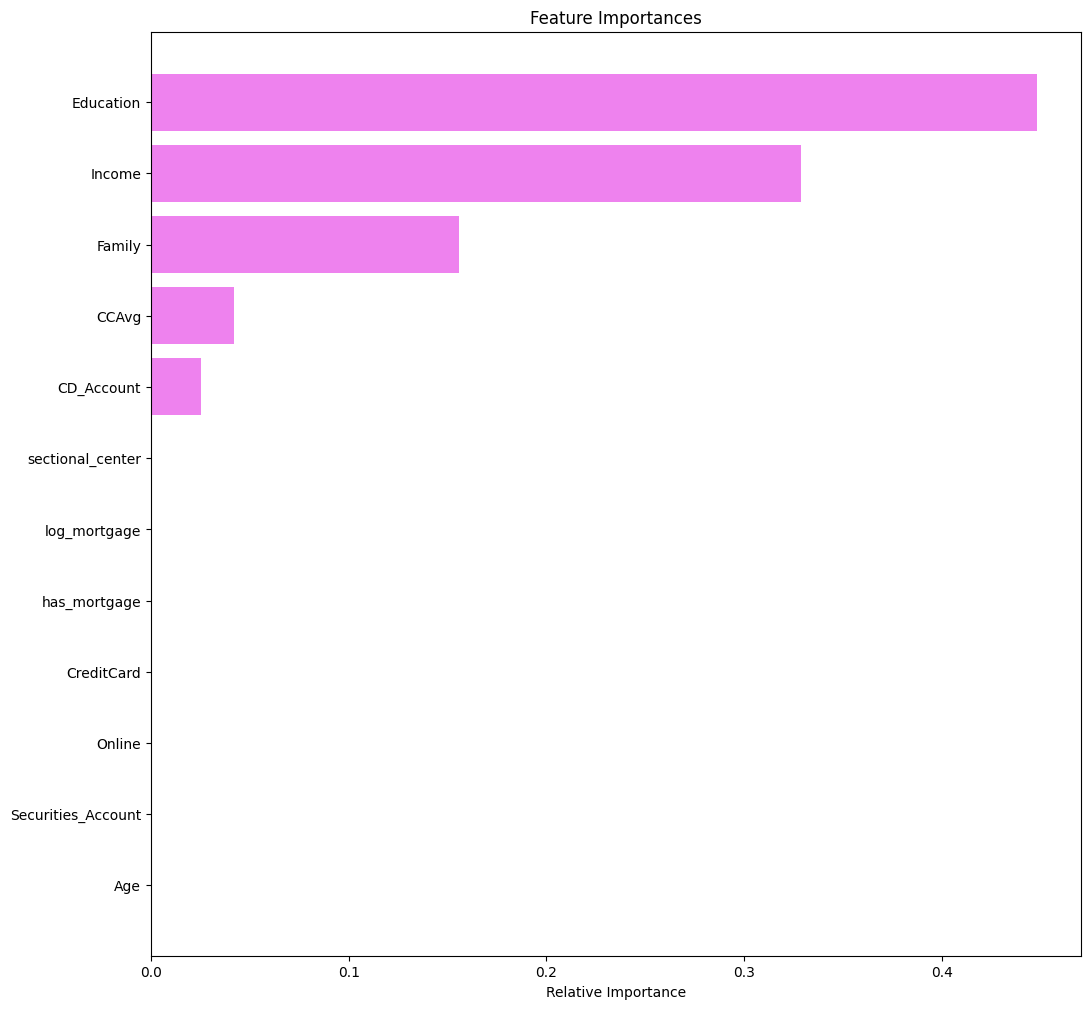

In [72]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Total impurity of leaves vs effective alphas of pruned tree

In [73]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [74]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000223    0.001114
2     0.000268    0.002188
3     0.000359    0.003263
4     0.000381    0.003644
5     0.000381    0.004025
6     0.000381    0.004406
7     0.000409    0.006042
8     0.000476    0.006519
9     0.000527    0.007046
10    0.000582    0.007628
11    0.000593    0.008813
12    0.000641    0.011379
13    0.000769    0.014456
14    0.000882    0.017985
15    0.001552    0.019536
16    0.002333    0.021869
17    0.003024    0.024893
18    0.003294    0.028187
19    0.006473    0.034659
20    0.023866    0.058525
21    0.056365    0.171255

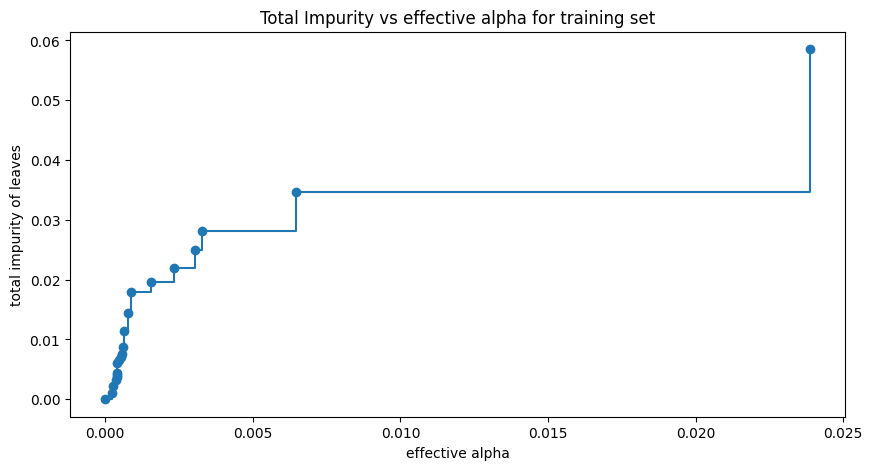

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [76]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


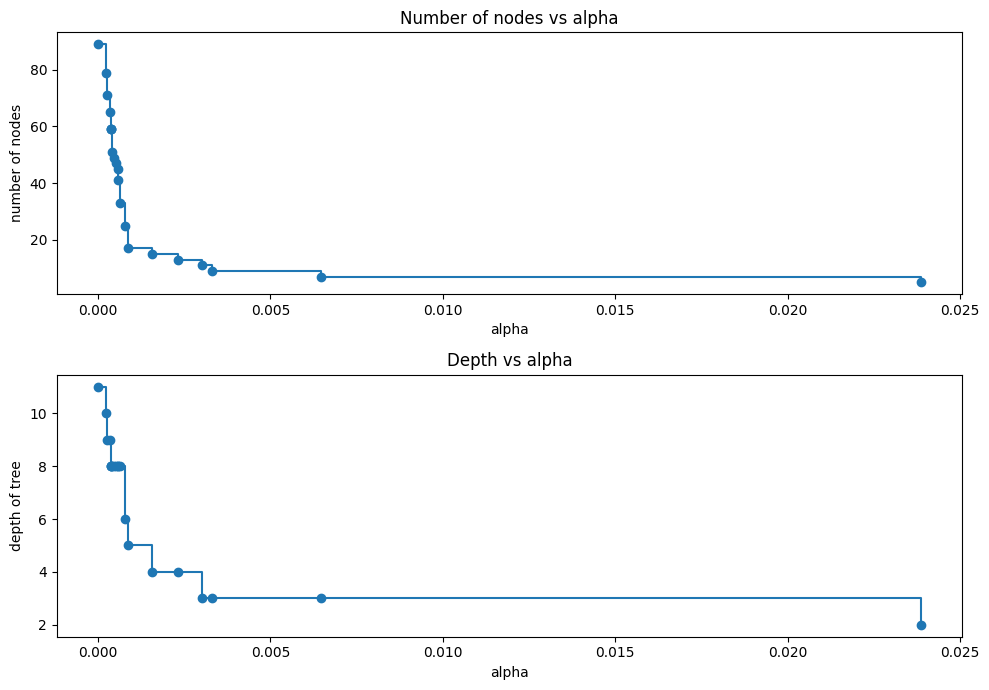

In [77]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Accuracy vs alpha for training and testing sets

In [78]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

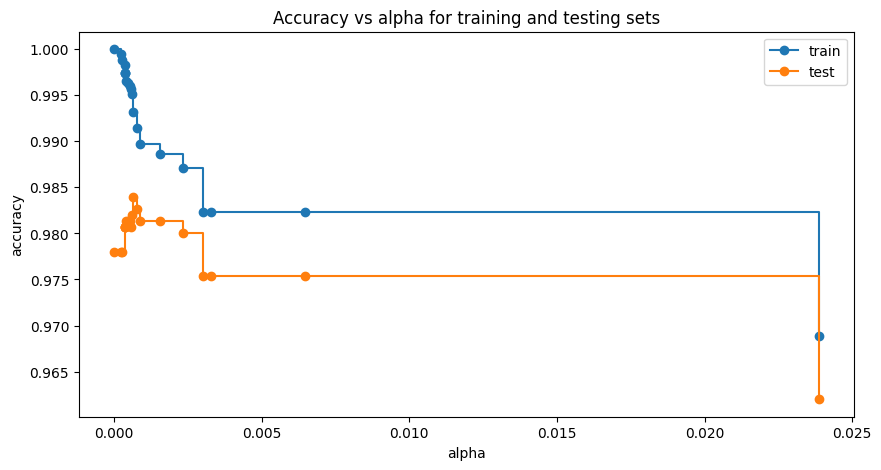

In [79]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [80]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)
Training accuracy of best model:  0.9931428571428571
Test accuracy of best model:  0.984


## Model Evaluation Criterion
Since accuracy isn't the right metric for our data we would want high recall, choosing recall as the primary metric means I prioritize minimizing the number of customers who would have accepted a loan but were not offered one (false negatives).

In [81]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [82]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=recall_score(y_test,pred_test3)
    recall_test.append(values_test)

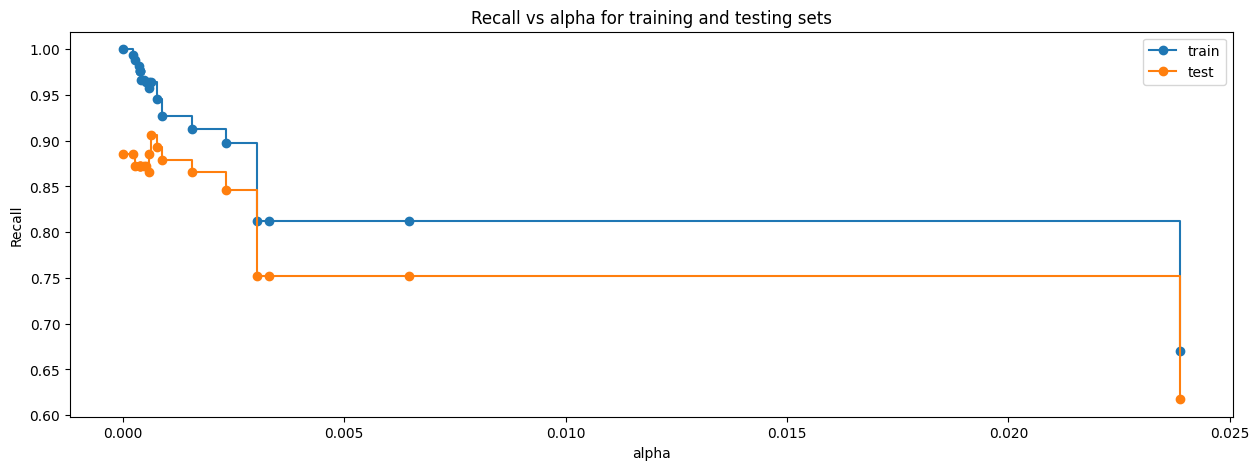

In [83]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [84]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


### Confusion Matrix - post-pruned decision tree

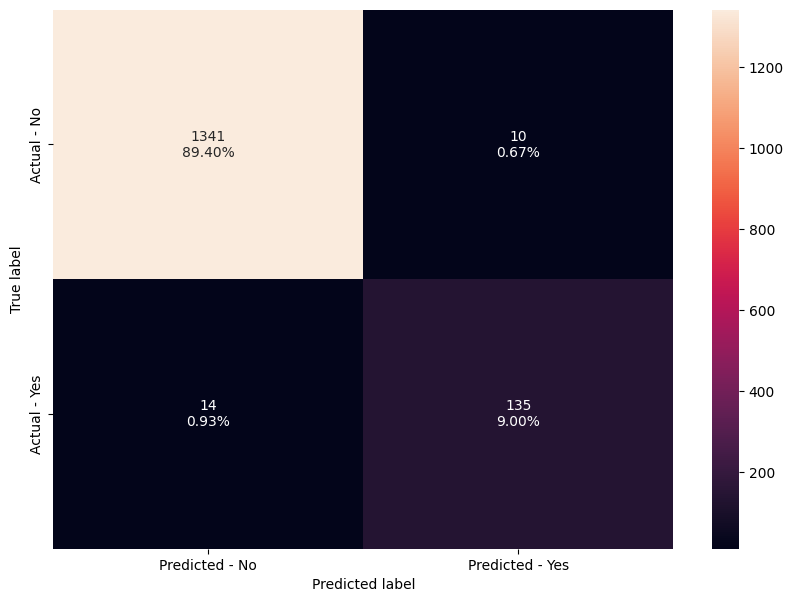

In [85]:
make_confusion_matrix(best_model,X_test, y_test)

In [86]:
# Recall on train and test
get_recall_score(best_model,X_train, X_test)

Recall on training set :  0.9637462235649547
Recall on test set :  0.9060402684563759


With post-pruning we get the highest recall on both training and test set

### Visualizing the Decision Tree

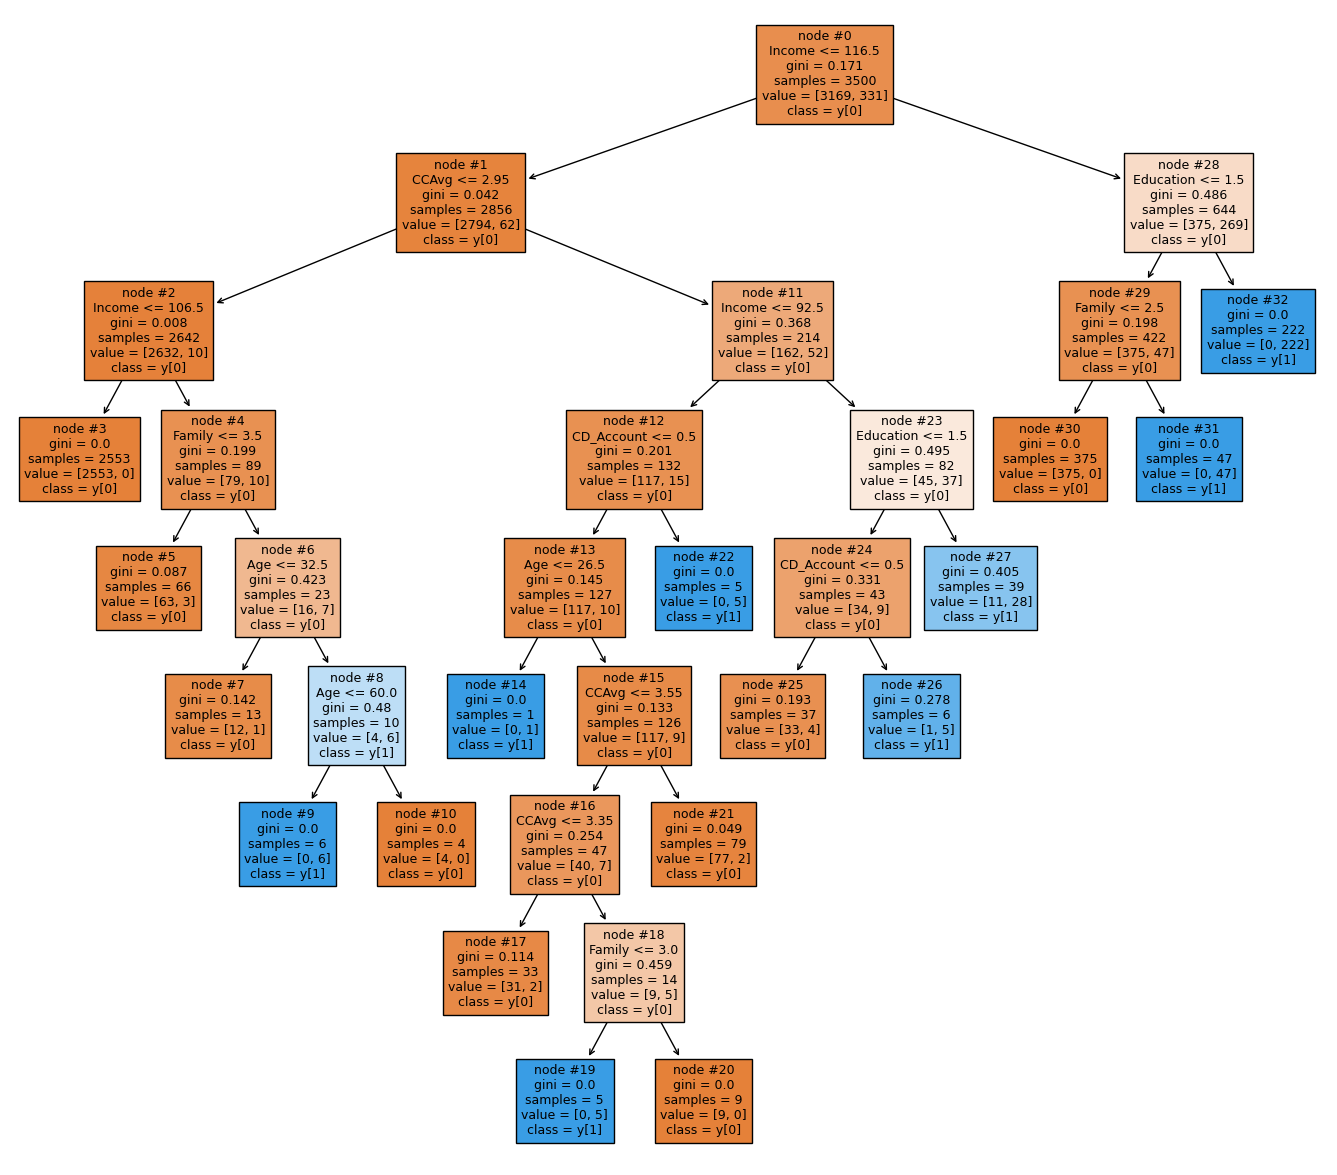

In [87]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [88]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.429489
Income              0.319013
Family              0.164852
CCAvg               0.045185
CD_Account          0.024298
Age                 0.017163
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000
has_mortgage        0.000000
log_mortgage        0.000000
sectional_center    0.000000


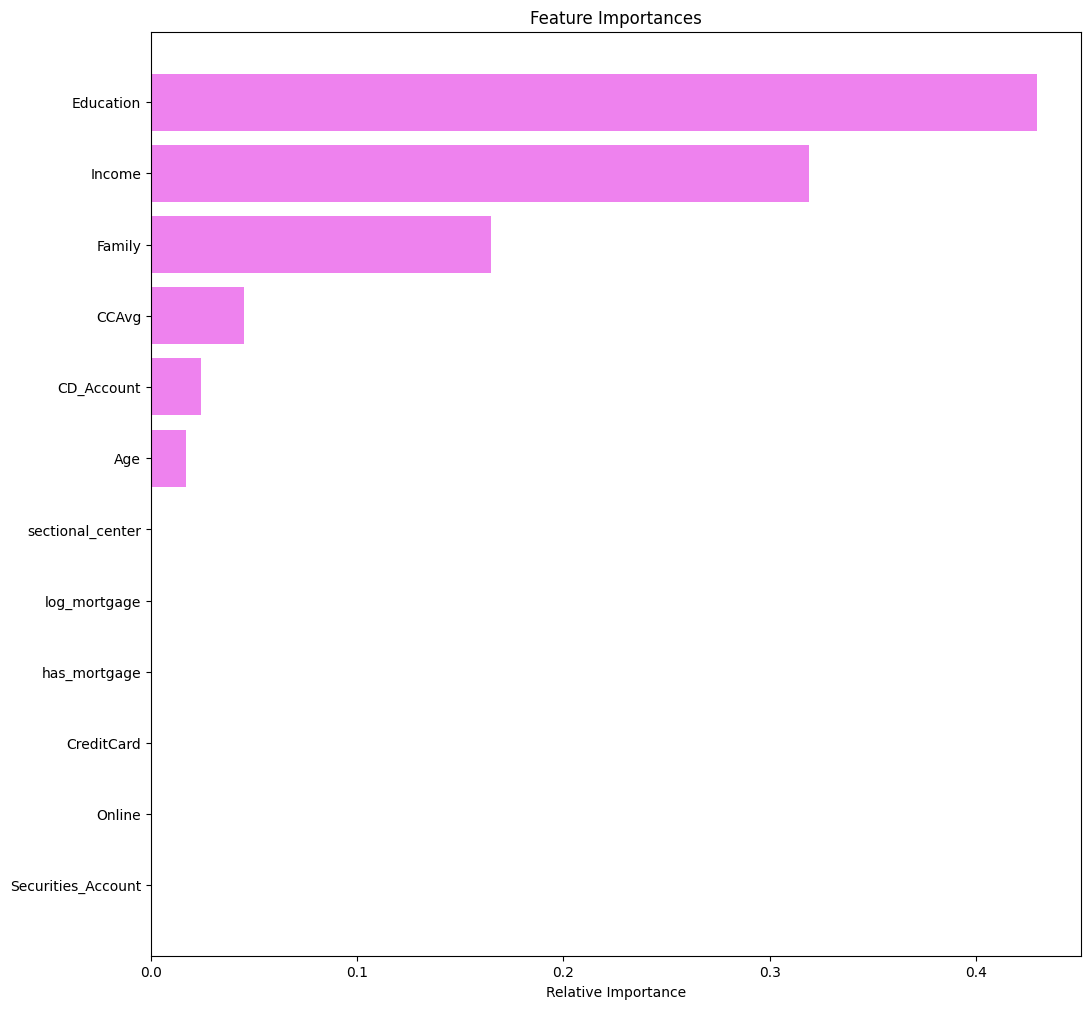

In [89]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Comparison and Final Model Selection

In [90]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 
                                 'Train_Recall':[1,0.9275,0.9637], 
                                 'Test_Recall':[0.886,0.8791,0.9060]})
comparison_frame

Model  Train_Recall  Test_Recall
0                Initial decision tree model        1.0000       0.8860
1  Decision treee with hyperparameter tuning        0.9275       0.8791
2            Decision tree with post-pruning        0.9637       0.9060

In [91]:
# Function to highlight the last row
def highlight_last_row(data):
    return ['background-color: lightgreen' if index == data.index[-1] else '' for index in data.index]

# Applying the function to the entire DataFrame
styled_df = comparison_frame.style.apply(highlight_last_row, axis=0)

# Display the styled DataFrame
styled_df

## Actionable Insights and Business Recommendations


From the feature importance we determine, we see that:
* Education level is the most critical factor in determining creditworthiness.
    * tailor credit product based on education levels. Create specific loan products based on the education level, for undergraduates, graduates, and advance professionals.
    * collaborate with educational institution to offer exclusive credit products to students and alumni
* Income-based credi offers, annual income significantly impacts a customer's ability to repay loans
    * use income data to identify high-potential customers for premium credit products and personalized financial services
* Family size influences financial responsibilities and repayment capacity
    * Develop family-centric credit products and services
* Credit card spending behavior provides insights into financial habits and discipline
    * Use credit card spending data to identify customers with responsible spending habits for pre-approved credit offers.
* Having a Certificate of Deposit account indicates financial stability and savings behavior
    * Bundle Certificate of Deposit with other financial products, such as loans or credit cards.
* Age consideration has a smaller impact

Engage with customers through targeted communication and personalized offers based on their financial profile described in the most important features, increasing the likelihood of product acceptance and customer retention.

___